In [ ]:
!pip install optuna xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_param_importances
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df=pd.read_csv('/content/Data Sheet - Sheet1.csv')

In [ ]:
df.head()

Crash_Severity  Vehicle_Speed  Crash_Time  Age  Gender   Vehicle_Type  \
0   Minor injury            107          11   27    Male  Heavy Vehicle   
1   Minor injury             27          16   39    Male            Car   
2   Minor injury             87          14   42  Female            Car   
3   Minor injury             43           3   60  Female  Heavy Vehicle   
4   Minor injury             72           8   70    Male            T.W   

   Number_of_Lanes  Lane_Width Road_Type Alcohol_Consumption Crash_Type  \
0                2    3.484386     Urban                 Yes   Rear-end   
1                2    3.293091     Rural                 Yes   Rear-end   
2                3    3.218911     Urban                  No   Rear-end   
3                2    3.113012     Rural                  No   Rear-end   
4                3    3.106580     Urban                 Yes   Rear-end   

  Seatbelt_Usage  Speed_Limit Road_Surface_Condition  
0             No           30                    Icy  
1            Yes          110                    Dry  
2             No           59                    Dry  
3             No           73                    Wet  
4            Yes           42                    Wet

In [ ]:
df.shape

(300, 14)

# Exploratory Data Analysis (EDA)

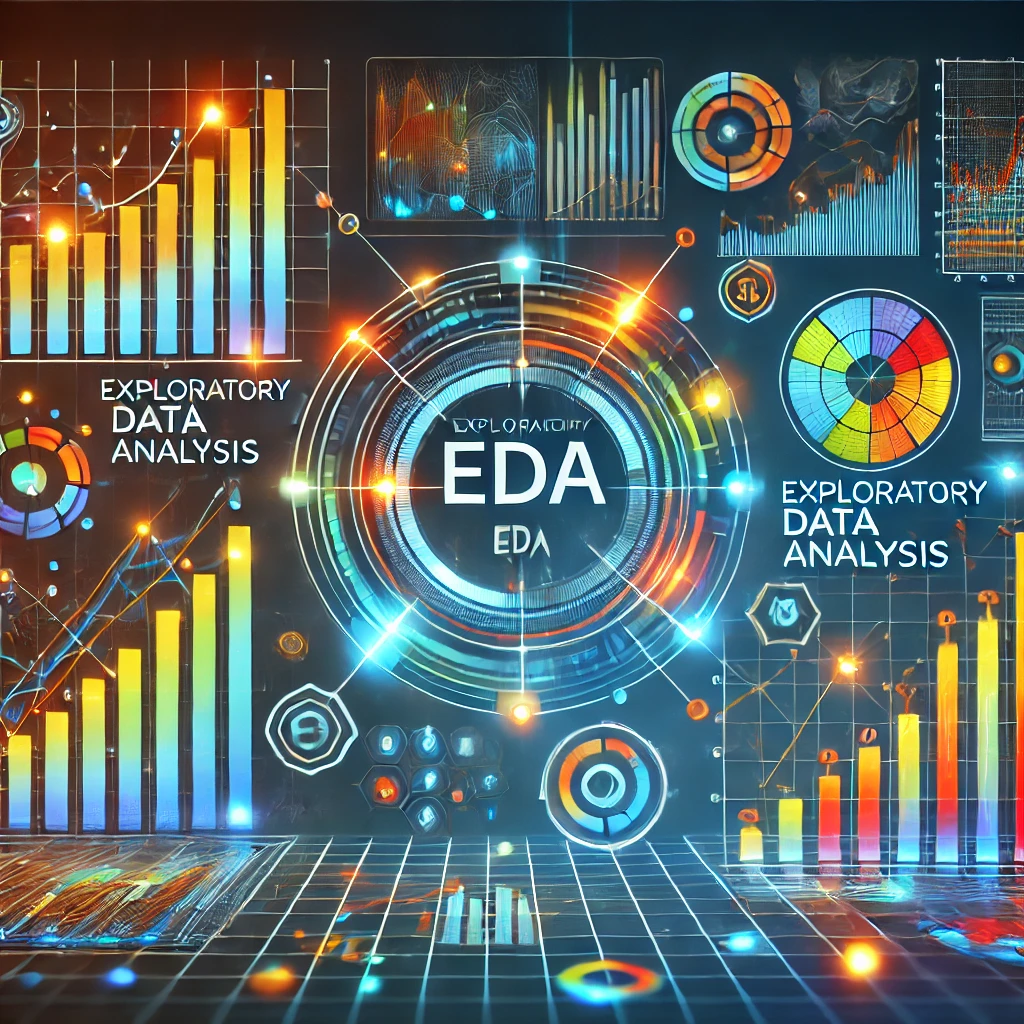

**Data Insights**

In [ ]:
df.isnull().sum()

Crash_Severity            0
Vehicle_Speed             0
Crash_Time                0
Age                       0
Gender                    0
Vehicle_Type              0
Number_of_Lanes           0
Lane_Width                0
Road_Type                 0
Alcohol_Consumption       0
Crash_Type                0
Seatbelt_Usage            0
Speed_Limit               0
Road_Surface_Condition    0
dtype: int64

In [ ]:
df.nunique()

Crash_Severity              3
Vehicle_Speed             105
Crash_Time                 24
Age                        62
Gender                      2
Vehicle_Type                3
Number_of_Lanes             3
Lane_Width                300
Road_Type                   2
Alcohol_Consumption         2
Crash_Type                  2
Seatbelt_Usage              2
Speed_Limit                85
Road_Surface_Condition      3
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crash_Severity          300 non-null    object 
 1   Vehicle_Speed           300 non-null    int64  
 2   Crash_Time              300 non-null    int64  
 3   Age                     300 non-null    int64  
 4   Gender                  300 non-null    object 
 5   Vehicle_Type            300 non-null    object 
 6   Number_of_Lanes         300 non-null    int64  
 7   Lane_Width              300 non-null    float64
 8   Road_Type               300 non-null    object 
 9   Alcohol_Consumption     300 non-null    object 
 10  Crash_Type              300 non-null    object 
 11  Seatbelt_Usage          300 non-null    object 
 12  Speed_Limit             300 non-null    int64  
 13  Road_Surface_Condition  300 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory 

In [ ]:
df.describe()

Vehicle_Speed  Crash_Time         Age  Number_of_Lanes  Lane_Width  \
count     300.000000  300.000000  300.000000       300.000000  300.000000   
mean       64.366667   11.690000   48.663333         2.000000    3.272374   
std        31.951974    6.740327   18.432104         0.825999    0.143053   
min        10.000000    0.000000   18.000000         1.000000    3.001781   
25%        37.000000    5.750000   31.000000         1.000000    3.150568   
50%        60.500000   12.000000   51.000000         2.000000    3.285620   
75%        94.000000   17.000000   65.000000         3.000000    3.394545   
max       120.000000   23.000000   80.000000         3.000000    3.497986   

       Speed_Limit  
count   300.000000  
mean     74.746667  
std      26.857903  
min      30.000000  
25%      51.000000  
50%      75.000000  
75%      97.250000  
max     120.000000

In [ ]:
df.head()

Crash_Severity  Vehicle_Speed  Crash_Time  Age  Gender   Vehicle_Type  \
0   Minor injury            107          11   27    Male  Heavy Vehicle   
1   Minor injury             27          16   39    Male            Car   
2   Minor injury             87          14   42  Female            Car   
3   Minor injury             43           3   60  Female  Heavy Vehicle   
4   Minor injury             72           8   70    Male            T.W   

   Number_of_Lanes  Lane_Width Road_Type Alcohol_Consumption Crash_Type  \
0                2    3.484386     Urban                 Yes   Rear-end   
1                2    3.293091     Rural                 Yes   Rear-end   
2                3    3.218911     Urban                  No   Rear-end   
3                2    3.113012     Rural                  No   Rear-end   
4                3    3.106580     Urban                 Yes   Rear-end   

  Seatbelt_Usage  Speed_Limit Road_Surface_Condition  
0             No           30                    Icy  
1            Yes          110                    Dry  
2             No           59                    Dry  
3             No           73                    Wet  
4            Yes           42                    Wet

In [ ]:
crash_severity_counts = df['Crash_Severity'].value_counts()
crash_severity_counts

Crash_Severity
Minor injury    100
Major injury    100
Fatal crash     100
Name: count, dtype: int64

## Feature Engineering

In [ ]:
# Define the bins for the ranges
bins = [0, 30, 60, 90, 120]

# Create the 'Vehicle Speed Range' column
df['Vehicle_Speed_Range'] = pd.cut(df['Vehicle_Speed'], bins=bins, labels=['0-30', '30-60', '60-90', '90-120'], include_lowest=True)

In [ ]:
bins = [18, 30, 40, 50, 60, 70, 80]

# Create the 'Age Range' column
df['Age_Range'] = pd.cut(df['Age'], bins=bins, labels=['18-30', '30-40', '40-50', '50-60', '60-70', '70-80'], include_lowest=True)

In [ ]:
# Define the bins for the ranges
bins = [3, 3.1, 3.2, 3.3, 3.4, 3.5]

# Create the 'Lane_Width_Range' column using pd.cut
df['Lane_Width_Range'] = pd.cut(df['Lane_Width'], bins=bins, labels=['3-3.1', '3.1-3.2', '3.2-3.3', '3.3-3.4', '3.4-3.5'], include_lowest=True)

In [ ]:
df['Over_Speeding'] = df['Vehicle_Speed'] - df['Speed_Limit']

In [ ]:
df['Over_Speeding_binary'] = np.where(df['Over_Speeding'] > 0, 1, 0)

In [ ]:
df.head()

Crash_Severity  Vehicle_Speed  Crash_Time  Age  Gender   Vehicle_Type  \
0   Minor injury            107          11   27    Male  Heavy Vehicle   
1   Minor injury             27          16   39    Male            Car   
2   Minor injury             87          14   42  Female            Car   
3   Minor injury             43           3   60  Female  Heavy Vehicle   
4   Minor injury             72           8   70    Male            T.W   

   Number_of_Lanes  Lane_Width Road_Type Alcohol_Consumption Crash_Type  \
0                2    3.484386     Urban                 Yes   Rear-end   
1                2    3.293091     Rural                 Yes   Rear-end   
2                3    3.218911     Urban                  No   Rear-end   
3                2    3.113012     Rural                  No   Rear-end   
4                3    3.106580     Urban                 Yes   Rear-end   

  Seatbelt_Usage  Speed_Limit Road_Surface_Condition Vehicle_Speed_Range  \
0             No           30                    Icy              90-120   
1            Yes          110                    Dry                0-30   
2             No           59                    Dry               60-90   
3             No           73                    Wet               30-60   
4            Yes           42                    Wet               60-90   

  Age_Range Lane_Width_Range  Over_Speeding  Over_Speeding_binary  
0     18-30          3.4-3.5             77                     1  
1     30-40          3.2-3.3            -83                     0  
2     40-50          3.2-3.3             28                     1  
3     50-60          3.1-3.2            -30                     0  
4     60-70          3.1-3.2             30                     1

## The Correlation Matrix

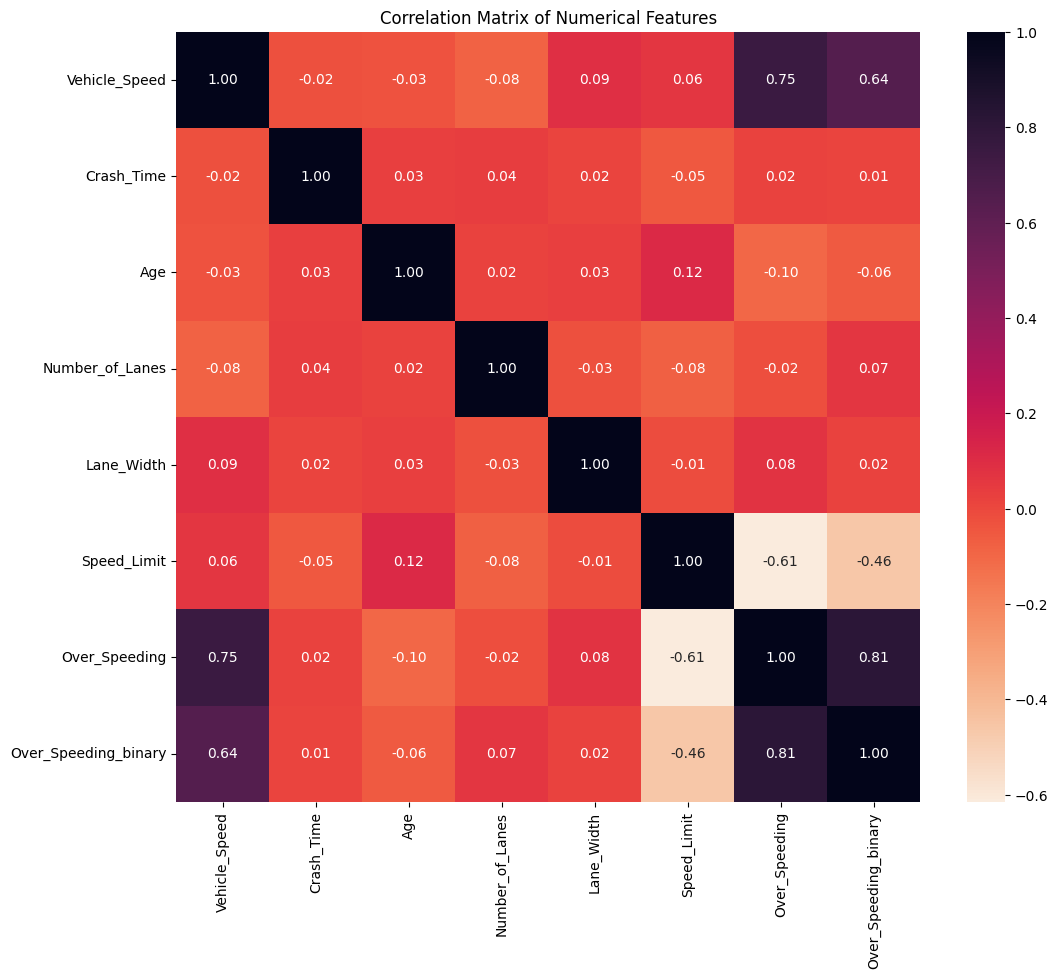

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='rocket_r', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


## IMPORTANT GRAPHS

**BOX PLOT OF Vehicle speed by Crash Severity**

<ipython-input-18-5909d04225f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Crash_Severity', y='Vehicle_Speed',palette='rocket_r')


<Axes: xlabel='Crash_Severity', ylabel='Vehicle_Speed'>

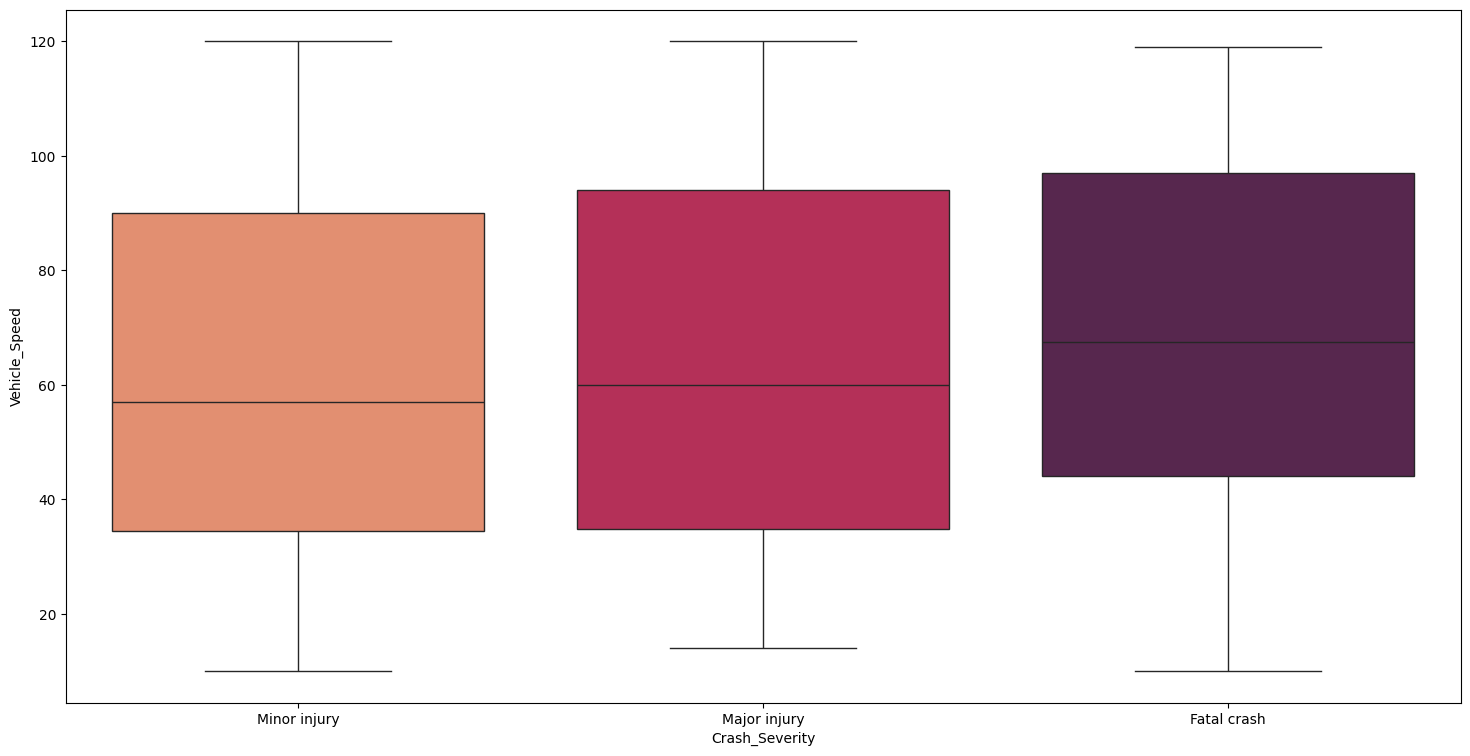

In [ ]:
plt.figure(figsize=(18, 9))
sns.boxplot(data=df, x='Crash_Severity', y='Vehicle_Speed',palette='rocket_r')

### Number of Crashes vs. Crash Time Plot

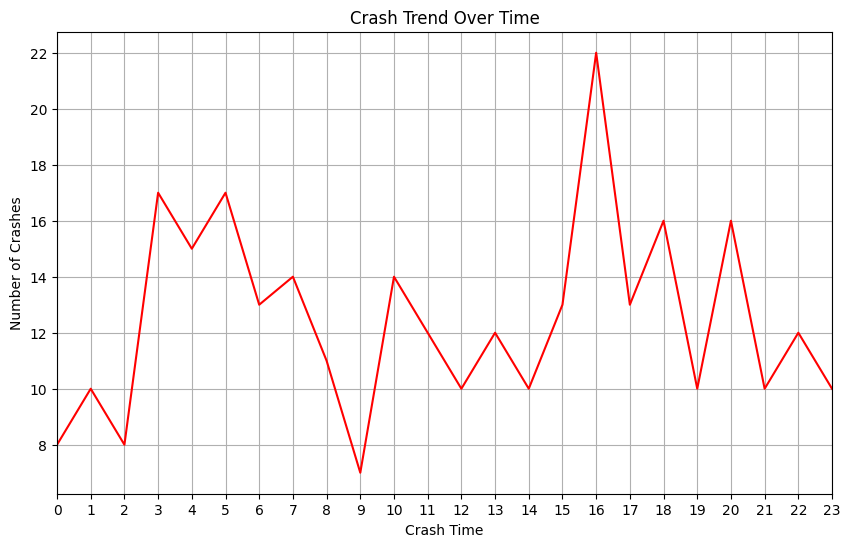

In [ ]:
time_series_data = df.groupby('Crash_Time')['Crash_Severity'].count()

plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data.values,color='red')
plt.title('Crash Trend Over Time')
plt.xlabel('Crash Time')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.xlim(0, 23)
plt.xticks(range(24))
plt.show()

### Vehicle Speed vs. Crash Time Plot

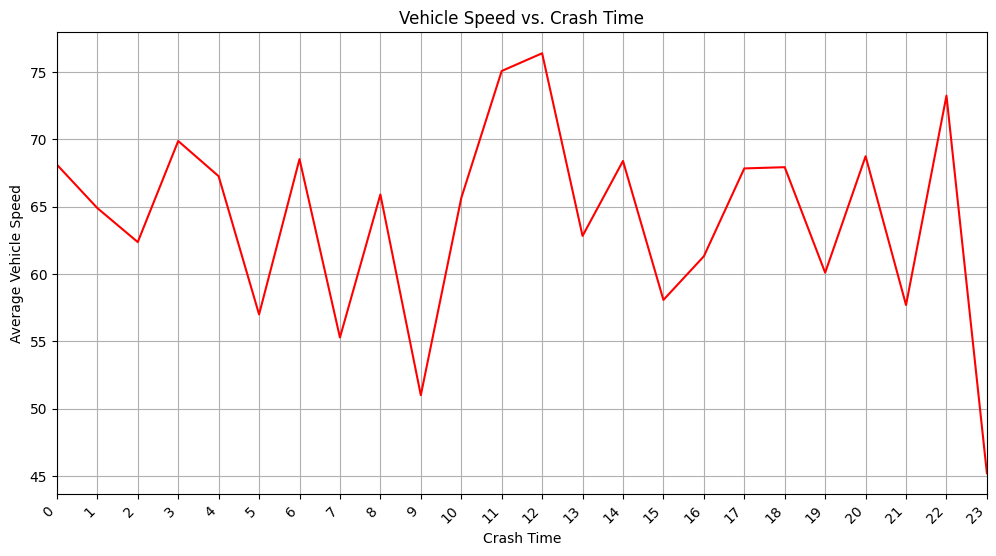

In [ ]:
grouped_data = df.groupby('Crash_Time')['Vehicle_Speed'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='Crash_Time', y='Vehicle_Speed', data=grouped_data,color="red")

# Set plot title and labels
plt.title('Vehicle Speed vs. Crash Time')
plt.xlabel('Crash Time')
plt.ylabel('Average Vehicle Speed')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.xlim(0, 23)
plt.xticks(range(24))
# Show the plot
plt.show()

### Lane width histogram(with KDE)

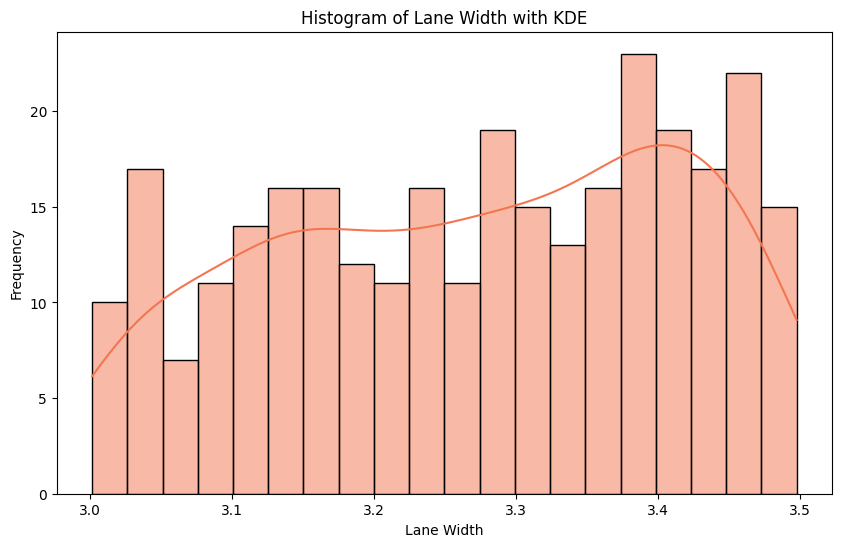

In [ ]:
plt.figure(figsize=(10, 6))

# Create the histplot with KDE
sns.histplot(
    data=df,
    x='Lane_Width',
    kde=True,
    bins=20,
    color=sns.color_palette("rocket_r")[1]  # Set the color using the first color of rocket_r palette
)

# Set plot title and labels
plt.title('Histogram of Lane Width with KDE')
plt.xlabel('Lane Width')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Speed Overlimit histogram

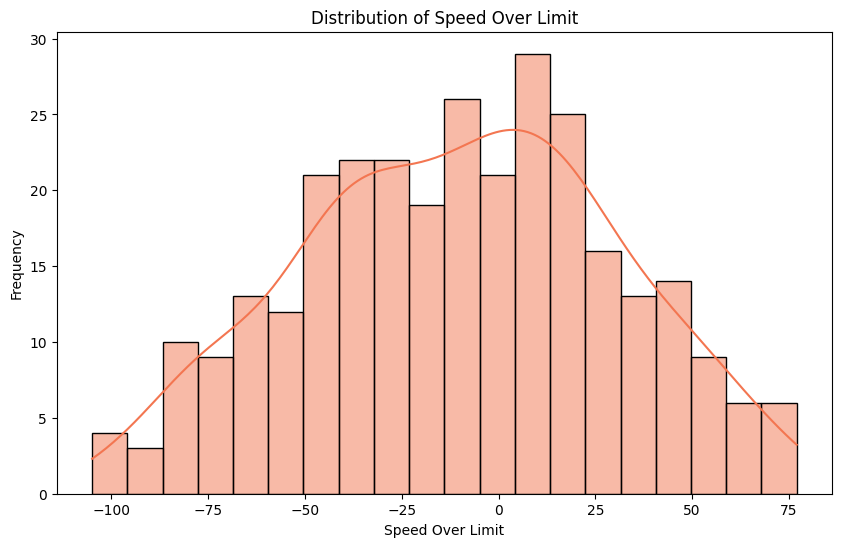

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Over_Speeding'], bins=20, kde=True,color=sns.color_palette("rocket_r")[1])
plt.title('Distribution of Speed Over Limit')
plt.xlabel('Speed Over Limit')
plt.ylabel('Frequency')
plt.show()

### Over Speeding or not pie chart

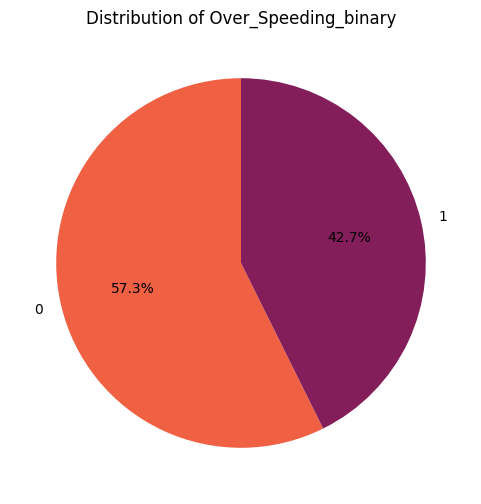

In [ ]:
over_speeding_counts = df['Over_Speeding_binary'].value_counts()
colors = sns.color_palette('rocket_r', n_colors=len(over_speeding_counts))
plt.figure(figsize=(6, 6))
plt.pie(over_speeding_counts, labels=over_speeding_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Over_Speeding_binary')
plt.show()

### Voilon plot of overspeeding by crash severity

<ipython-input-24-e68479eecb8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Crash_Severity', y='Over_Speeding', data=df, palette='rocket_r')


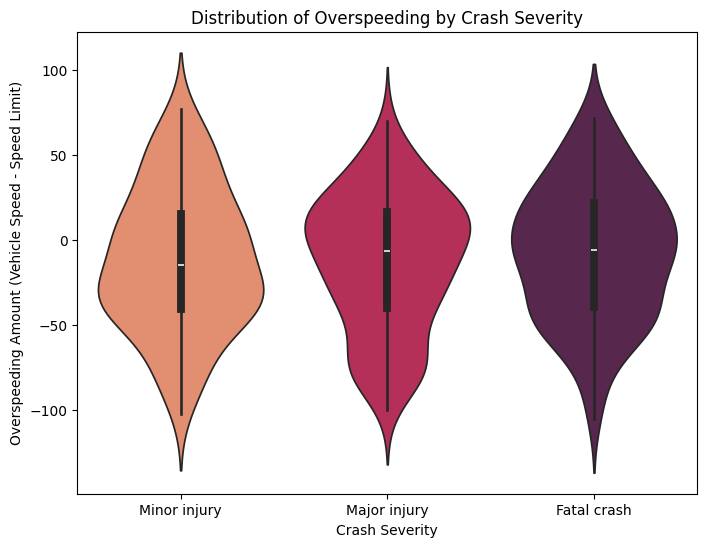

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Crash_Severity', y='Over_Speeding', data=df, palette='rocket_r')

plt.xlabel("Crash Severity")
plt.ylabel("Overspeeding Amount (Vehicle Speed - Speed Limit)")
plt.title("Distribution of Overspeeding by Crash Severity")
plt.show()

### Vehicle Speed Range by crash severity countplot

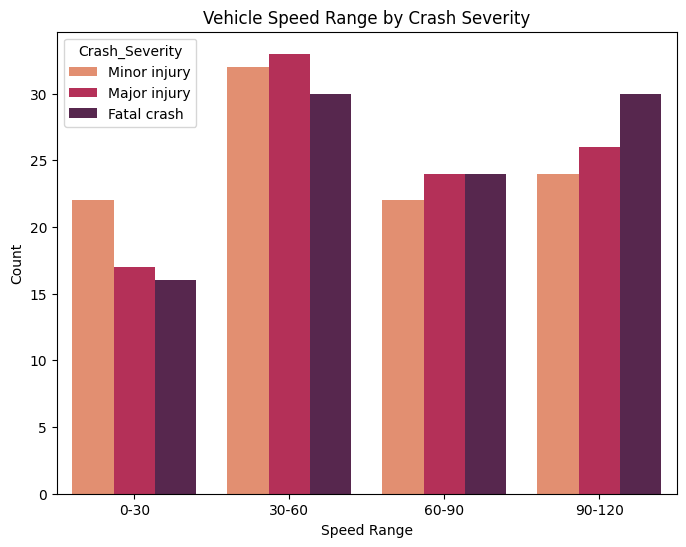

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Vehicle_Speed_Range", hue="Crash_Severity",palette='rocket_r')
plt.title("Vehicle Speed Range by Crash Severity")
plt.xlabel("Speed Range")
plt.ylabel("Count")
plt.show()

### Pie Chart of distribution of Age Range

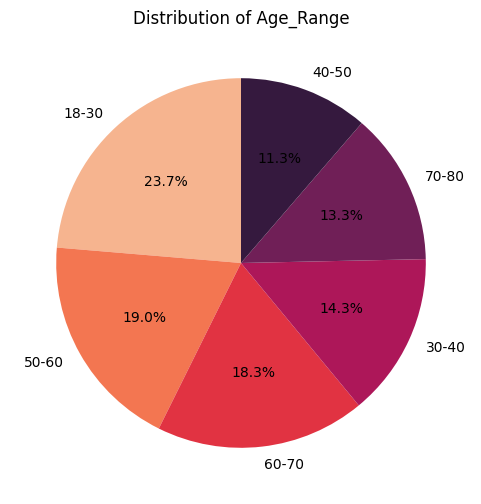

In [ ]:
Age_Range_counts = df['Age_Range'].value_counts()
colors = sns.color_palette('rocket_r', n_colors=len(Age_Range_counts))

plt.figure(figsize=(6, 6))
plt.pie(Age_Range_counts, labels=Age_Range_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age_Range')
plt.show()


### Box plot of speed distribution by age range with crash severity

<Figure size 1200x800 with 0 Axes>

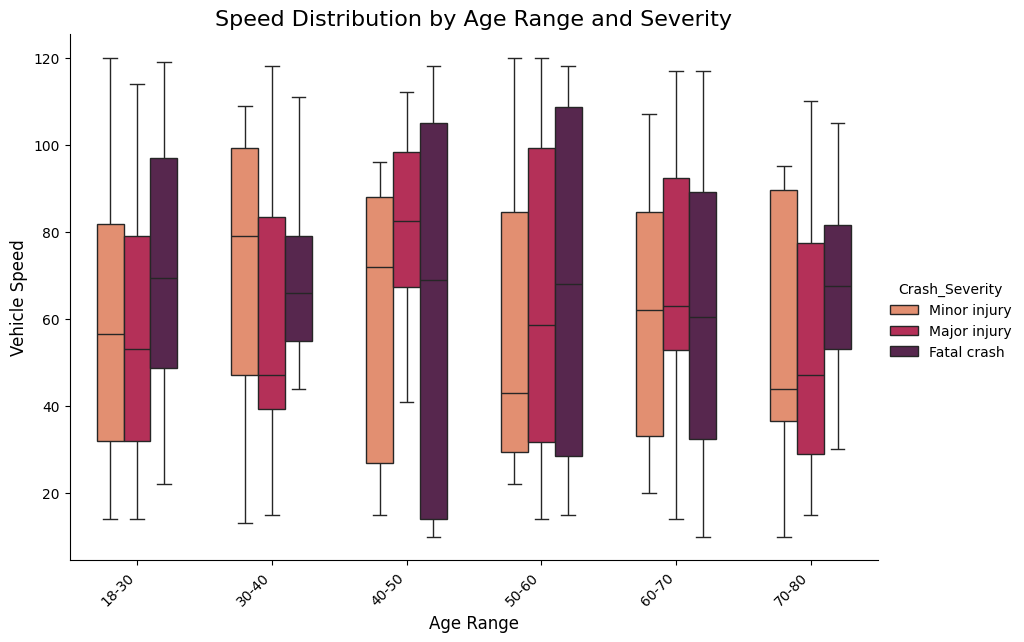

In [ ]:
plt.figure(figsize=(12, 8))

sns.catplot(
    data=df,
    x="Age_Range",
    y="Vehicle_Speed",
    hue="Crash_Severity",
    kind="box",
    palette='rocket_r',
    dodge=True,
    width=0.6,
    height=6,
    aspect=1.5
)

plt.title("Speed Distribution by Age Range and Severity", fontsize=16)
plt.xlabel("Age Range", fontsize=12)
plt.ylabel("Vehicle Speed", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

### Pie chart of lane width range

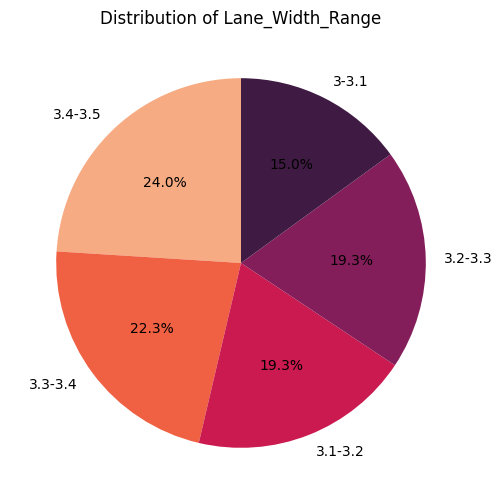

In [ ]:
Lane_Width_Range_counts = df['Lane_Width_Range'].value_counts()
colors = sns.color_palette('rocket_r', n_colors=len(Lane_Width_Range_counts))

plt.figure(figsize=(6, 6))
plt.pie(Lane_Width_Range_counts, labels=Lane_Width_Range_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Lane_Width_Range')
plt.show()

### Countplot of crash severity by lane width range

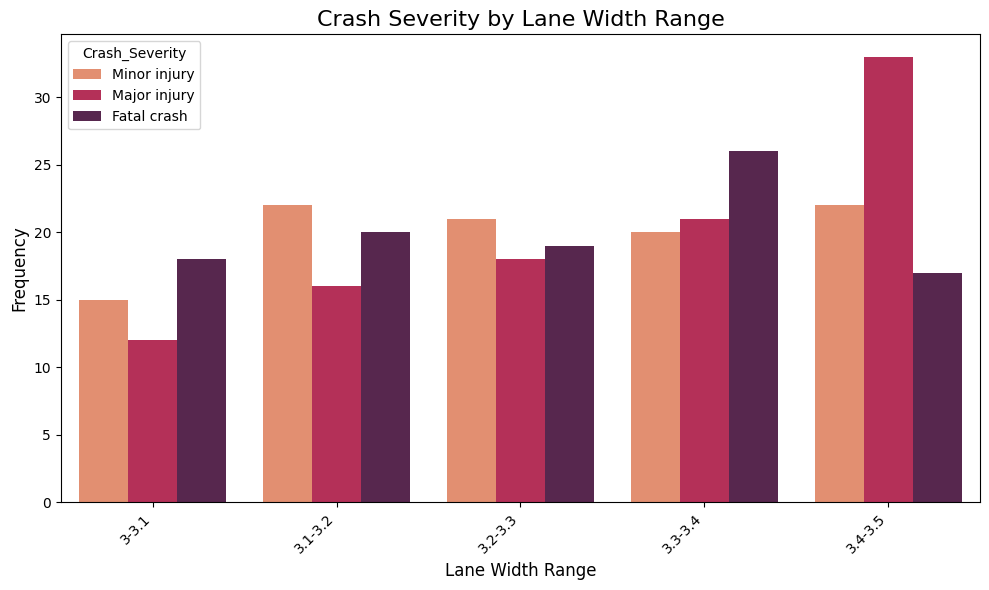

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Lane_Width_Range", hue="Crash_Severity", palette='rocket_r')
plt.title("Crash Severity by Lane Width Range", fontsize=16)
plt.xlabel("Lane Width Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### Countplot of crash severity by number of lanes

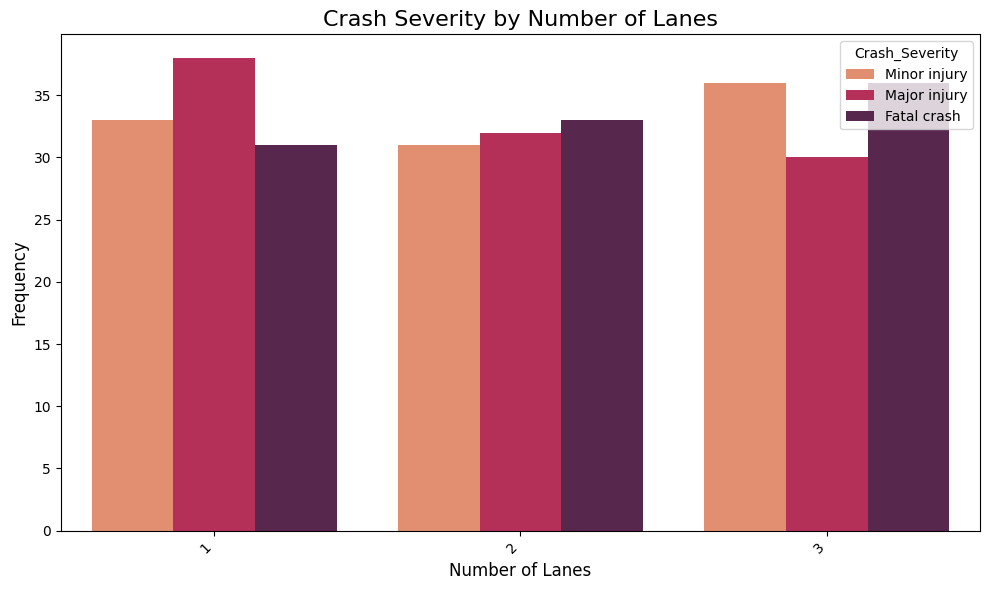

In [ ]:
grouped_data = df.groupby(['Number_of_Lanes', 'Crash_Severity'])['Crash_Severity'].count().unstack()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Number_of_Lanes", hue="Crash_Severity", palette='rocket_r')
plt.title("Crash Severity by Number of Lanes", fontsize=16)
plt.xlabel("Number of Lanes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### Countplot of vehicle types by number of lanes

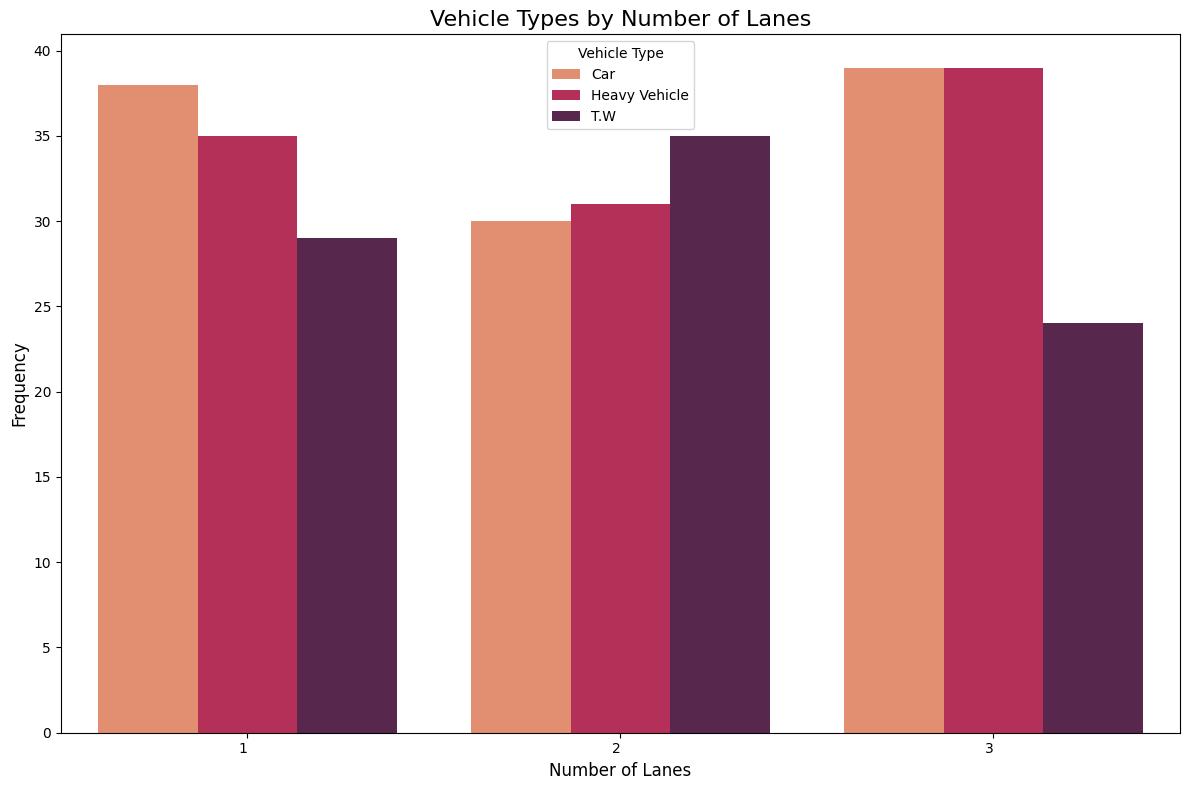

In [ ]:
grouped_data = df.groupby(['Number_of_Lanes', 'Vehicle_Type'])['Vehicle_Type'].count().unstack()
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Number_of_Lanes", hue="Vehicle_Type", palette='rocket_r')
plt.title("Vehicle Types by Number of Lanes", fontsize=16)
plt.xlabel("Number of Lanes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(ha='right', fontsize=10)
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()

### Heatmap of crash Severity by Number of Lanes and Vehicle Type

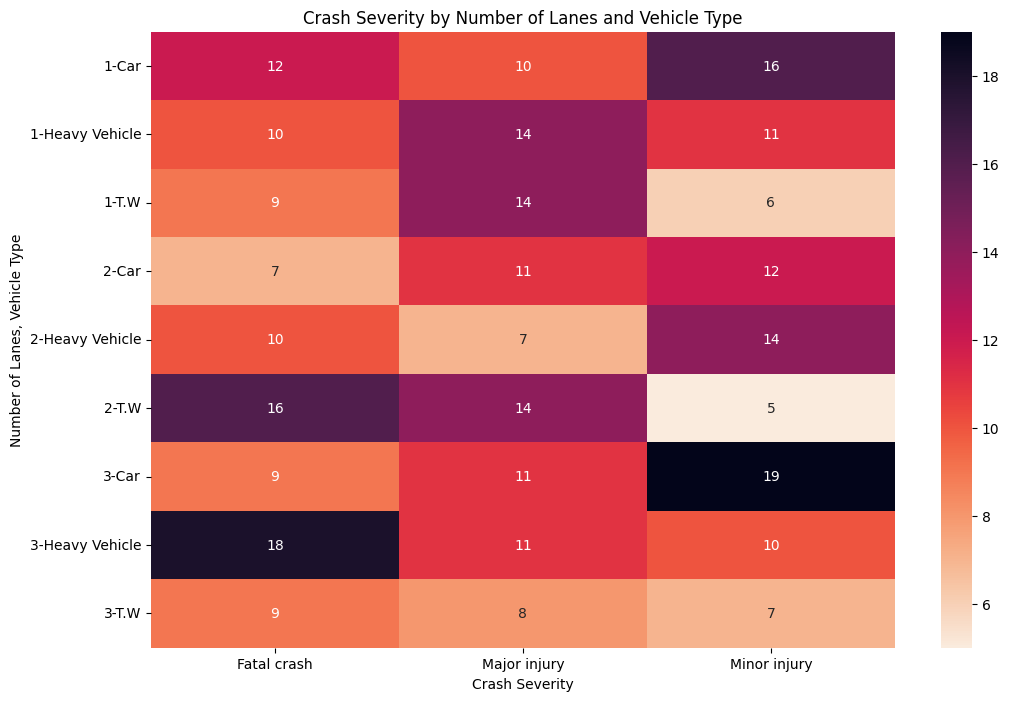

In [ ]:
grouped_data = df.groupby(['Number_of_Lanes', 'Vehicle_Type', 'Crash_Severity'])['Crash_Severity'].count().reset_index(name='Count')

heatmap_data = grouped_data.pivot(index=['Number_of_Lanes', 'Vehicle_Type'], columns='Crash_Severity', values='Count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="rocket_r", fmt="d")
plt.title("Crash Severity by Number of Lanes and Vehicle Type")
plt.xlabel("Crash Severity")
plt.ylabel("Number of Lanes, Vehicle Type")
plt.show()

### Countplot of Overspeeding or not by Number of lanes

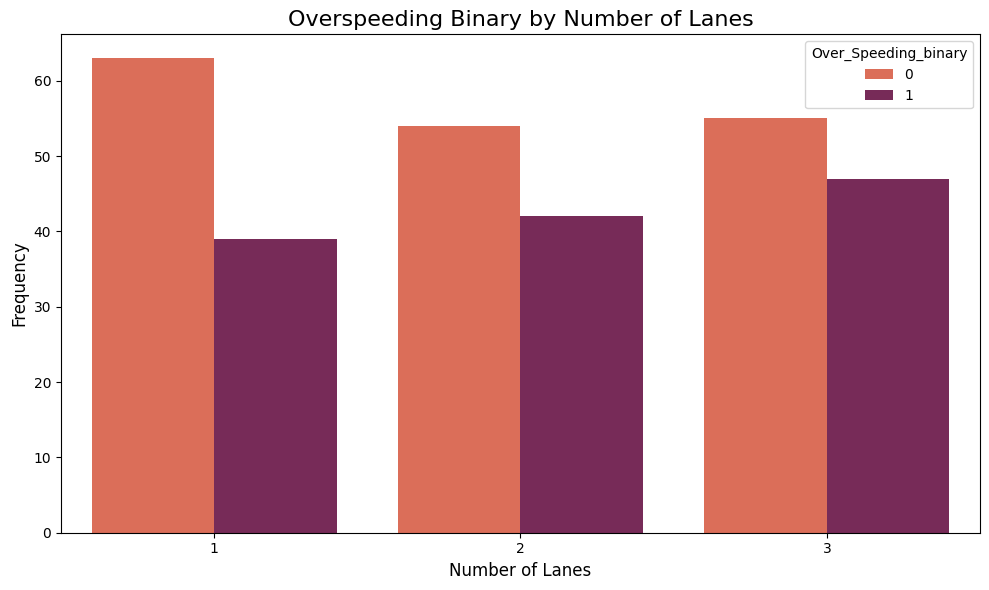

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Number_of_Lanes", hue="Over_Speeding_binary", palette='rocket_r')
plt.title("Overspeeding Binary by Number of Lanes", fontsize=16)
plt.xlabel("Number of Lanes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

### Box plot of vehicle speed distribution by number of lanes

<ipython-input-35-7c59021f4ce0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Number_of_Lanes", y="Vehicle_Speed", palette='rocket_r')


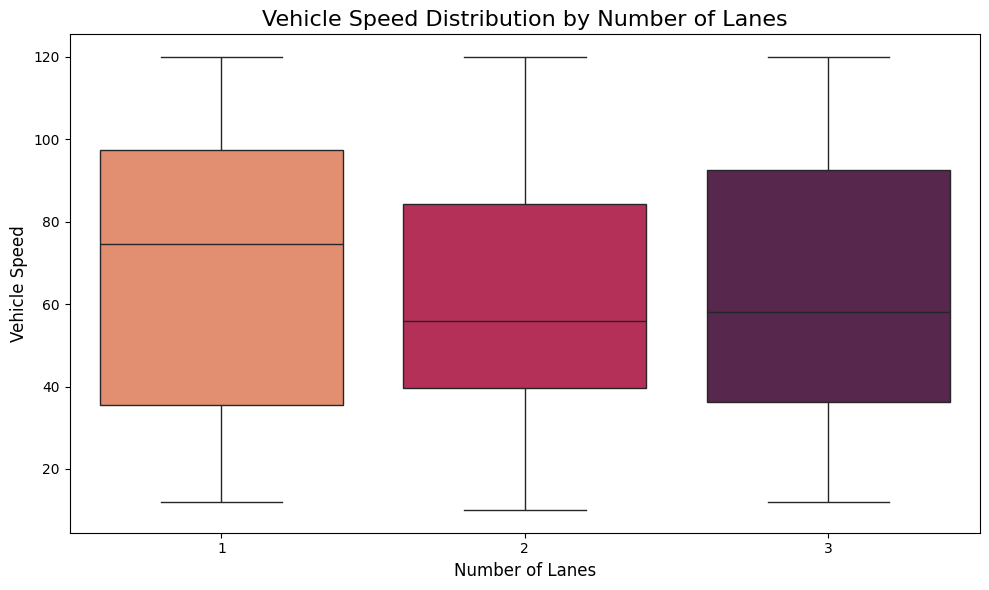

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Number_of_Lanes", y="Vehicle_Speed", palette='rocket_r')
plt.title("Vehicle Speed Distribution by Number of Lanes", fontsize=16)
plt.xlabel("Number of Lanes", fontsize=12)
plt.ylabel("Vehicle Speed", fontsize=12)
plt.tight_layout()
plt.show()

### Heatmap of Crash Severity by number of lanes and alochol consumption

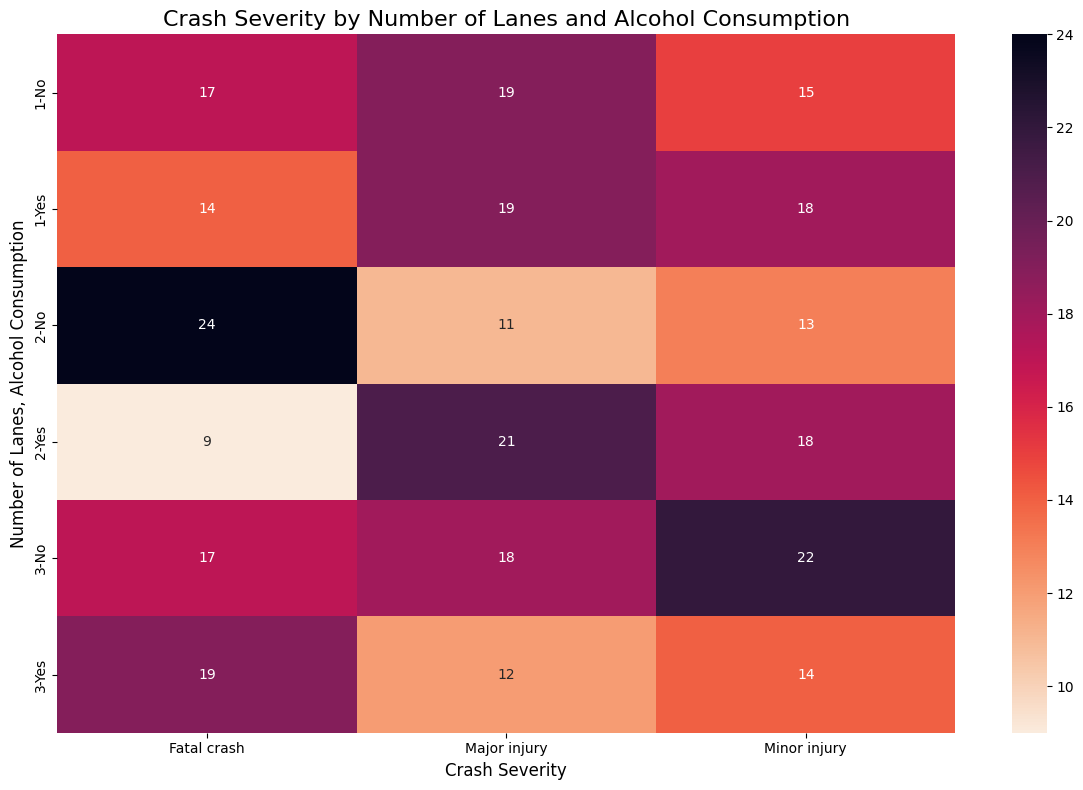

In [ ]:
grouped_data = df.groupby(['Number_of_Lanes', 'Alcohol_Consumption', 'Crash_Severity'])['Crash_Severity'].count().reset_index(name='Count')

heatmap_data = grouped_data.pivot(index=['Number_of_Lanes', 'Alcohol_Consumption'],
                                 columns='Crash_Severity', values='Count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="rocket_r", fmt="d")
plt.title("Crash Severity by Number of Lanes and Alcohol Consumption", fontsize=16)
plt.xlabel("Crash Severity", fontsize=12)
plt.ylabel("Number of Lanes, Alcohol Consumption", fontsize=12)
plt.tight_layout()
plt.show()

### Boxplot of speedlimit by number of lanes

<ipython-input-37-80ccd92e8e22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Number_of_Lanes", y="Speed_Limit", palette='rocket_r')


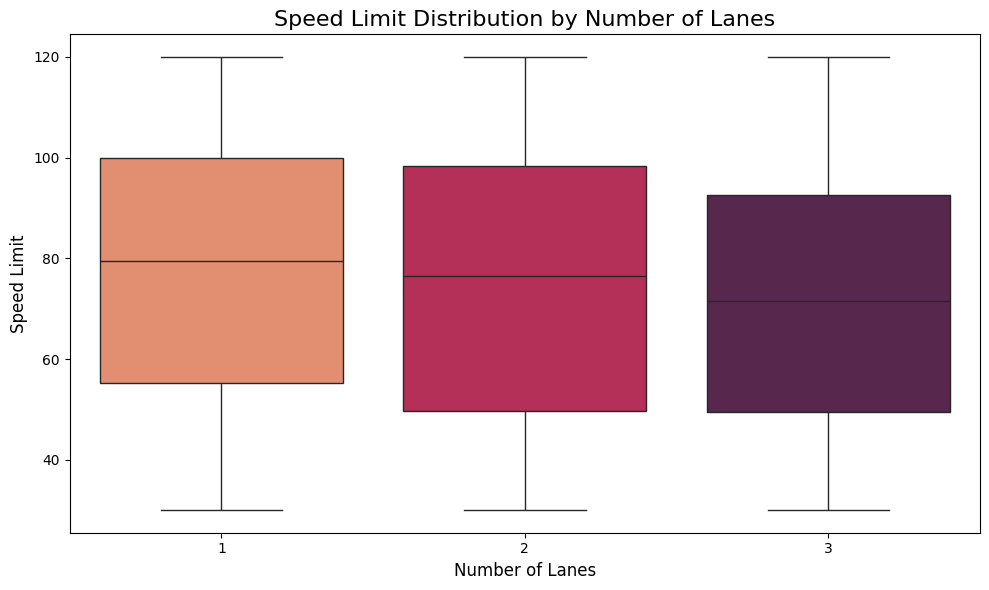

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(data=df, x="Number_of_Lanes", y="Speed_Limit", palette='rocket_r')
plt.title("Speed Limit Distribution by Number of Lanes", fontsize=16)
plt.xlabel("Number of Lanes", fontsize=12)
plt.ylabel("Speed Limit", fontsize=12)
plt.tight_layout()
plt.show()

### Countplot of crash severity by lane width range

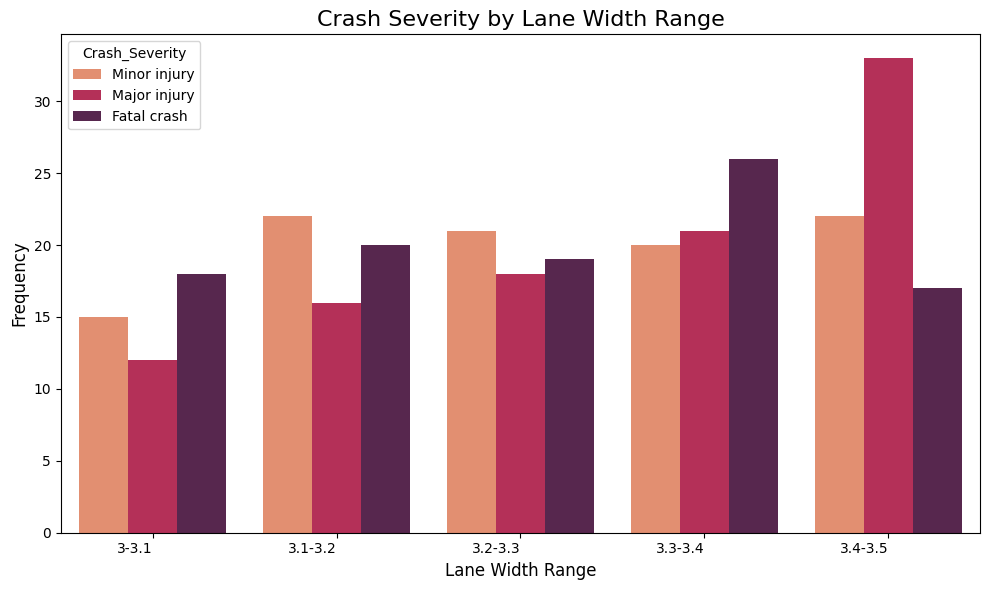

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Lane_Width_Range", hue="Crash_Severity", palette='rocket_r')
plt.title("Crash Severity by Lane Width Range", fontsize=16)
plt.xlabel("Lane Width Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

### Countplot of vehicle type by lane width range

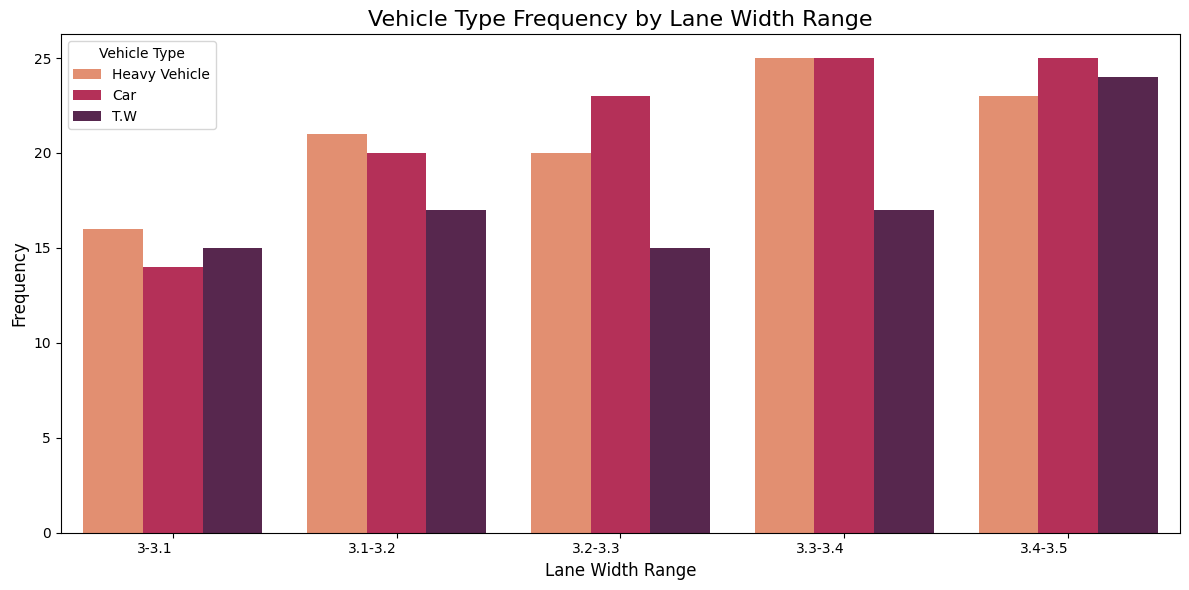

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Lane_Width_Range", hue="Vehicle_Type", palette='rocket_r')
plt.title("Vehicle Type Frequency by Lane Width Range", fontsize=16)
plt.xlabel("Lane Width Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(ha='right')
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()

### Countplot of vehicle speed range by lane width range

<ipython-input-40-d506d892b8c6>:3: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.histplot(data=df, x="Vehicle_Speed_Range", hue="Lane_Width_Range",


([0, 1, 2, 3],
 [Text(0, 0, '0-30'),
  Text(1, 0, '30-60'),
  Text(2, 0, '60-90'),
  Text(3, 0, '90-120')])

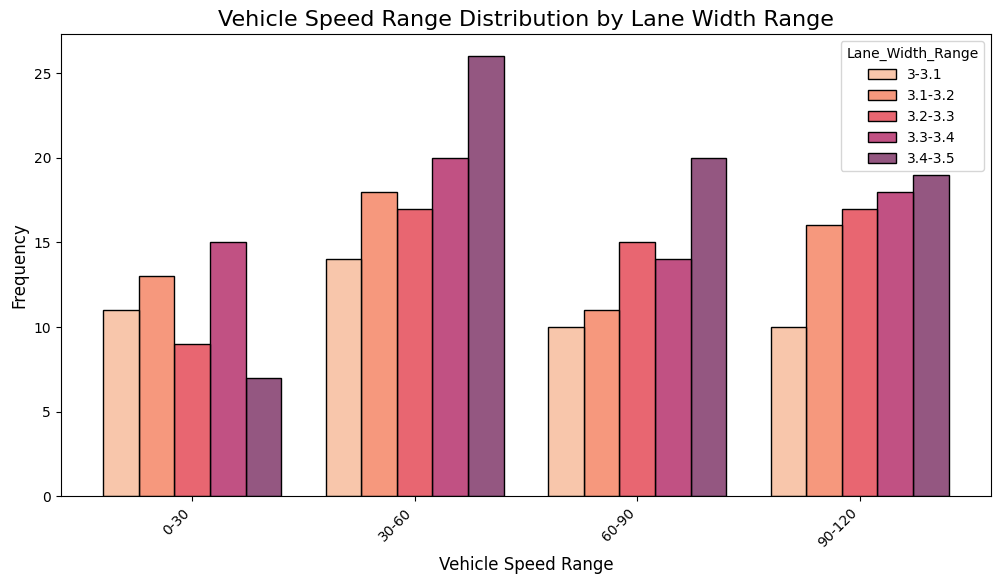

In [ ]:
plt.figure(figsize=(12, 6))
rocket_cmap = sns.color_palette("rocket_r")
sns.histplot(data=df, x="Vehicle_Speed_Range", hue="Lane_Width_Range",
             multiple="dodge", shrink=.8, palette= rocket_cmap)
plt.title("Vehicle Speed Range Distribution by Lane Width Range", fontsize=16)
plt.xlabel("Vehicle Speed Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Crash_Severity          300 non-null    object  
 1   Vehicle_Speed           300 non-null    int64   
 2   Crash_Time              300 non-null    int64   
 3   Age                     300 non-null    int64   
 4   Gender                  300 non-null    object  
 5   Vehicle_Type            300 non-null    object  
 6   Number_of_Lanes         300 non-null    int64   
 7   Lane_Width              300 non-null    float64 
 8   Road_Type               300 non-null    object  
 9   Alcohol_Consumption     300 non-null    object  
 10  Crash_Type              300 non-null    object  
 11  Seatbelt_Usage          300 non-null    object  
 12  Speed_Limit             300 non-null    int64   
 13  Road_Surface_Condition  300 non-null    object  
 14  Vehicle_Speed_Range     30

## Label Encoding the Categorical Data

In [ ]:
le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

Crash_Severity  Vehicle_Speed  Crash_Time  Age  Gender  Vehicle_Type  \
0               2            107          11   27       1             1   
1               2             27          16   39       1             0   
2               2             87          14   42       0             0   
3               2             43           3   60       0             1   
4               2             72           8   70       1             2   

   Number_of_Lanes  Lane_Width  Road_Type  Alcohol_Consumption  Crash_Type  \
0                2    3.484386          1                    1           1   
1                2    3.293091          0                    1           1   
2                3    3.218911          1                    0           1   
3                2    3.113012          0                    0           1   
4                3    3.106580          1                    1           1   

   Seatbelt_Usage  Speed_Limit  Road_Surface_Condition  Vehicle_Speed_Range  \
0               0           30                       1                    3   
1               1          110                       0                    0   
2               0           59                       0                    2   
3               0           73                       2                    1   
4               1           42                       2                    2   

   Age_Range  Lane_Width_Range  Over_Speeding  Over_Speeding_binary  
0          0                 4             77                     1  
1          1                 2            -83                     0  
2          2                 2             28                     1  
3          3                 1            -30                     0  
4          4                 1             30                     1

# ML Model

In [ ]:
X = df.drop('Crash_Severity',axis=1)
y = df['Crash_Severity']

# Split the data into training and testing sets (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X.head()

Vehicle_Speed  Crash_Time  Age  Gender  Vehicle_Type  Number_of_Lanes  \
0            107          11   27       1             1                2   
1             27          16   39       1             0                2   
2             87          14   42       0             0                3   
3             43           3   60       0             1                2   
4             72           8   70       1             2                3   

   Lane_Width  Road_Type  Alcohol_Consumption  Crash_Type  Seatbelt_Usage  \
0    3.484386          1                    1           1               0   
1    3.293091          0                    1           1               1   
2    3.218911          1                    0           1               0   
3    3.113012          0                    0           1               0   
4    3.106580          1                    1           1               1   

   Speed_Limit  Road_Surface_Condition  Vehicle_Speed_Range  Age_Range  \
0           30                       1                    3          0   
1          110                       0                    0          1   
2           59                       0                    2          2   
3           73                       2                    1          3   
4           42                       2                    2          4   

   Lane_Width_Range  Over_Speeding  Over_Speeding_binary  
0                 4             77                     1  
1                 2            -83                     0  
2                 2             28                     1  
3                 1            -30                     0  
4                 1             30                     1

In [ ]:
print("Value Counts of y_train:\n", y_train.value_counts())
print("Value Counts of y_test:\n", y_test.value_counts())

Value Counts of y_train:
 Crash_Severity
0    80
1    80
2    80
Name: count, dtype: int64
Value Counts of y_test:
 Crash_Severity
0    20
2    20
1    20
Name: count, dtype: int64


## Feature Selection Strategy

In [ ]:

def tune_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 400),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 30),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(tune_rf, n_trials=100)

print(f"Best parameters for Random Forest: {study_rf.best_params}")
print(f"Best accuracy for Random Forest: {study_rf.best_value}")

[I 2024-12-27 03:35:31,968] A new study created in memory with name: no-name-bab1f115-e59e-4e99-b8b4-7b515ca20186
[I 2024-12-27 03:35:32,526] Trial 0 finished with value: 0.43333333333333335 and parameters: {'n_estimators': 152, 'max_depth': 20, 'min_samples_split': 21, 'min_samples_leaf': 17, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.43333333333333335.
[I 2024-12-27 03:35:33,671] Trial 1 finished with value: 0.45 and parameters: {'n_estimators': 323, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.45.
[I 2024-12-27 03:35:34,704] Trial 2 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 295, 'max_depth': 8, 'min_samples_split': 25, 'min_samples_leaf': 20, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.45.
[I 2024-12-27 03:35:35,279] Trial 3 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 183, 'm

Best parameters for Random Forest: {'n_estimators': 378, 'max_depth': 18, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}
Best accuracy for Random Forest: 0.5166666666666667


In [ ]:
plot_optimization_history(study_rf).show()
plot_parallel_coordinate(study_rf).show()
plot_param_importances(study_rf).show()

In [ ]:
best_params_rf = study_rf.best_params
best_params_rf

{'n_estimators': 378,
 'max_depth': 18,
 'min_samples_split': 16,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'bootstrap': False}

In [ ]:
final_model_rf = RandomForestClassifier(**best_params_rf, random_state=42)
final_model_rf.fit(X_train, y_train)

y_pred = final_model_rf.predict(X_test)

report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)
print(cm)

              precision    recall  f1-score   support

           0       0.63      0.60      0.62        20
           1       0.44      0.35      0.39        20
           2       0.48      0.60      0.53        20

    accuracy                           0.52        60
   macro avg       0.52      0.52      0.51        60
weighted avg       0.52      0.52      0.51        60

[[12  5  3]
 [ 3  7 10]
 [ 4  4 12]]


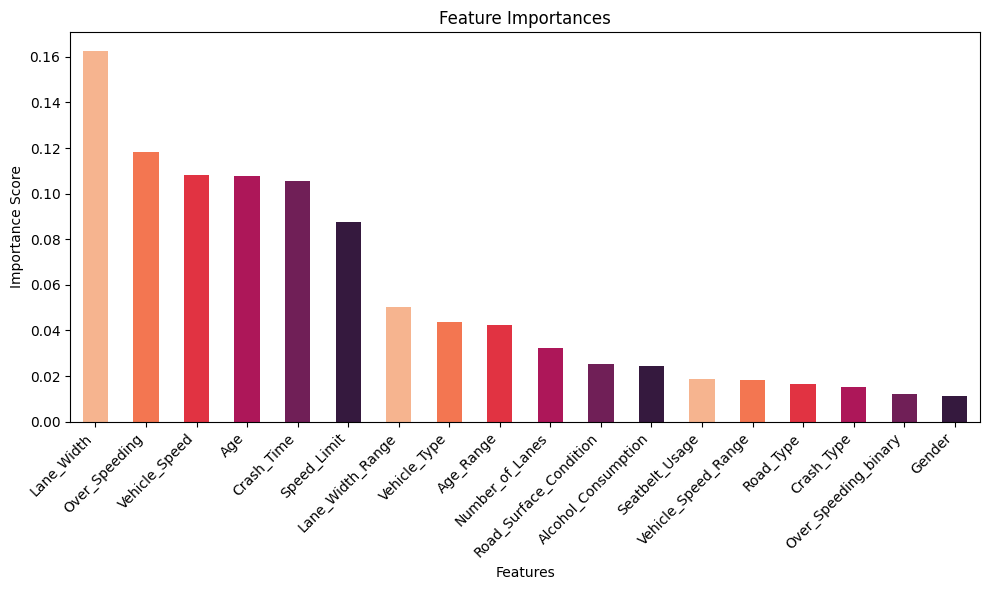

In [ ]:
importances = final_model_rf.feature_importances_

feature_importances = pd.Series(importances, index=X_train.columns)

feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color=sns.color_palette("rocket_r"))
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**Training the model using the top 5 features with the highest importance. This approach aims to reduce the noise captured by the model due to the inclusion of unnecessary features, thereby improving its performance.**

In [ ]:
X = df[['Vehicle_Speed', 'Crash_Time', 'Age', 'Over_Speeding', 'Lane_Width']]
y = df['Crash_Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X.head()

Vehicle_Speed  Crash_Time  Age  Over_Speeding  Lane_Width
0            107          11   27             77    3.484386
1             27          16   39            -83    3.293091
2             87          14   42             28    3.218911
3             43           3   60            -30    3.113012
4             72           8   70             30    3.106580

In [ ]:
print("Value Counts of y_train:\n", y_train.value_counts())
print("Value Counts of y_test:\n", y_test.value_counts())

Value Counts of y_train:
 Crash_Severity
0    80
1    80
2    80
Name: count, dtype: int64
Value Counts of y_test:
 Crash_Severity
0    20
2    20
1    20
Name: count, dtype: int64


## Random Forest

In [ ]:


def tune_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 40, 200),
        "max_depth": trial.suggest_int("max_depth", 1, 15),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(tune_rf, n_trials=100)

print(f"Best parameters for Random Forest: {study_rf.best_params}")
print(f"Best accuracy for Random Forest: {study_rf.best_value}")

[I 2024-12-27 03:36:35,395] A new study created in memory with name: no-name-8eddfca1-5242-4368-a880-86410546af5b
[I 2024-12-27 03:36:35,568] Trial 0 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 88, 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.4166666666666667.
[I 2024-12-27 03:36:35,925] Trial 1 finished with value: 0.4 and parameters: {'n_estimators': 139, 'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.4166666666666667.
[I 2024-12-27 03:36:36,290] Trial 2 finished with value: 0.48333333333333334 and parameters: {'n_estimators': 159, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.48333333333333334.
[I 2024-12-27 03:36:36,574] Trial 3 finished with value: 0.31666666666666665 and parameters:

Best parameters for Random Forest: {'n_estimators': 47, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}
Best accuracy for Random Forest: 0.5666666666666667


In [ ]:
plot_optimization_history(study_rf).show()
plot_parallel_coordinate(study_rf).show()
plot_param_importances(study_rf).show()

In [ ]:
best_params_rf = study_rf.best_params
best_params_rf

{'n_estimators': 47,
 'max_depth': 13,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'bootstrap': False}

In [ ]:
final_model_rf2 = RandomForestClassifier(**best_params_rf, random_state=42)
final_model_rf2.fit(X_train, y_train)



y_pred = final_model_rf2.predict(X_test)

report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)
print(cm)

              precision    recall  f1-score   support

           0       0.57      0.65      0.60        20
           1       0.67      0.40      0.50        20
           2       0.52      0.65      0.58        20

    accuracy                           0.57        60
   macro avg       0.58      0.57      0.56        60
weighted avg       0.58      0.57      0.56        60

[[13  3  4]
 [ 4  8  8]
 [ 6  1 13]]


**By reducing the number of features, the model's performance improves, indicating that a larger number of features introduces noise. Therefore, we will develop the next models using a reduced set of features to enhance efficiency and accuracy.**

## XGBoost

In [ ]:


def tune_xgboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "lambda": trial.suggest_float("lambda", 0.01, 1.0),  # L2 regularization
        "alpha": trial.suggest_float("alpha", 0.01, 1.0),  # L1 regularization
    }
    model = XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study_xgboost = optuna.create_study(direction="maximize")
study_xgboost.optimize(tune_xgboost, n_trials=100)

print(f"Best parameters for XGBoost: {study_xgboost.best_params}")
print(f"Best accuracy for XGBoost: {study_xgboost.best_value}")

[I 2024-12-27 03:37:00,660] A new study created in memory with name: no-name-14b68343-9d65-4aa4-a9c2-5a1108b2dc9c
[I 2024-12-27 03:37:00,860] Trial 0 finished with value: 0.35 and parameters: {'n_estimators': 91, 'learning_rate': 0.09976104884931185, 'max_depth': 3, 'min_child_weight': 2.4619537074386812, 'subsample': 0.7439332432870425, 'colsample_bytree': 0.6587543404450612, 'lambda': 0.5804973101620332, 'alpha': 0.2273926364277207}. Best is trial 0 with value: 0.35.
[I 2024-12-27 03:37:00,957] Trial 1 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 85, 'learning_rate': 0.06287294919695693, 'max_depth': 5, 'min_child_weight': 2.448065461209292, 'subsample': 0.4303404548728511, 'colsample_bytree': 0.7697653826920628, 'lambda': 0.6185543218555047, 'alpha': 0.6524820643657764}. Best is trial 1 with value: 0.38333333333333336.
[I 2024-12-27 03:37:01,099] Trial 2 finished with value: 0.35 and parameters: {'n_estimators': 254, 'learning_rate': 0.042196490106783544

Best parameters for XGBoost: {'n_estimators': 135, 'learning_rate': 0.016008706411913622, 'max_depth': 10, 'min_child_weight': 5.695465604837583, 'subsample': 0.5937972479815148, 'colsample_bytree': 0.9390776801903074, 'lambda': 0.7647026080877449, 'alpha': 0.7268348089676459}
Best accuracy for XGBoost: 0.48333333333333334


In [ ]:
plot_optimization_history(study_xgboost).show()
plot_parallel_coordinate(study_xgboost).show()
plot_param_importances(study_xgboost).show()

In [ ]:
best_params_xgboost = study_xgboost.best_params
best_params_xgboost

{'n_estimators': 135,
 'learning_rate': 0.016008706411913622,
 'max_depth': 10,
 'min_child_weight': 5.695465604837583,
 'subsample': 0.5937972479815148,
 'colsample_bytree': 0.9390776801903074,
 'lambda': 0.7647026080877449,
 'alpha': 0.7268348089676459}

In [ ]:
final_model_xgboost = XGBClassifier(**best_params_xgboost, random_state=42)
final_model_xgboost.fit(X_train, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = final_model_xgboost.predict(X_test)

report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)
print(cm)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.50      0.35      0.41        20
           2       0.46      0.60      0.52        20

    accuracy                           0.48        60
   macro avg       0.49      0.48      0.48        60
weighted avg       0.49      0.48      0.48        60

[[10  4  6]
 [ 5  7  8]
 [ 5  3 12]]


## LightGBM

In [ ]:

def tune_lightgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 10, 50),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 20),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.01, 1.0),  # L1 regularization
        "lambda_l2": trial.suggest_float("lambda_l2", 0.01, 1.0),  # L2 regularization
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 1.0),
    }
    model = LGBMClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study_lightgbm = optuna.create_study(direction="maximize")
study_lightgbm.optimize(tune_lightgbm, n_trials=100)

print(f"Best parameters for LightGBM: {study_lightgbm.best_params}")
print(f"Best accuracy for LightGBM: {study_lightgbm.best_value}")

[I 2024-12-27 03:37:29,695] A new study created in memory with name: no-name-a0e9c2b7-d772-4b82-a1e6-1df9d876f4b5


[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=0.7238289863393195, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7238289863393195
[LightGBM] [Warning] lambda_l2 is set=0.06105877097954852, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06105877097954852
[LightGBM] [Warning] lambda_l1 is set=0.9377682946181254, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9377682946181254
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=0.7238289863393195, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7238289863393195
[LightGBM] [Warning] lambda_l2 is set=0.06105877097954852, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06105877097954852
[LightGBM] [Warning] lambda_l1 is set=0.937

[I 2024-12-27 03:37:29,996] Trial 0 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 90, 'learning_rate': 0.09079262417057261, 'num_leaves': 18, 'min_data_in_leaf': 14, 'lambda_l1': 0.9377682946181254, 'lambda_l2': 0.06105877097954852, 'feature_fraction': 0.7238289863393195}. Best is trial 0 with value: 0.36666666666666664.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:30,402] Trial 1 finished with value: 0.2833333333333333 and parameters: {'n_estimators': 166, 'learning_rate': 0.09107016075615763, 'num_leaves': 43, 'min_data_in_leaf': 7, 'lambda_l1': 0.6904019374272711, 'lambda_l2': 0.615469273046258, 'feature_fraction': 0.4235381236807153}. Best is trial 0 with value: 0.36666666666666664.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:30,896] Trial 2 finished with value: 0.35 and parameters: {'n_estimators': 196, 'learning_rate': 0.03609299359553393, 'num_leaves': 19, 'min_data_in_leaf': 11, 'lambda_l1': 0.13402658121393396, 'lambda_l2': 0.27789948439226775, 'feature_fraction': 0.5363117429061398}. Best is trial 0 with value: 0.36666666666666664.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:31,174] Trial 3 finished with value: 0.4 and parameters: {'n_estimators': 115, 'learning_rate': 0.08766742705436231, 'num_leaves': 22, 'min_data_in_leaf': 19, 'lambda_l1': 0.695705095506185, 'lambda_l2': 0.969006364810083, 'feature_fraction': 0.9021558629667776}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.23919178484083964, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23919178484083964
[LightGBM] [Warning] lambda_l2 is set=0.7630722834845536, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7630722834845536
[LightGBM] [Warning] lambda_l1 is set=0.5063412995548575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5063412995548575
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.23919178484083964, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23919178484083964
[LightGBM] [Warning] lambda_l2 is set=0.7630722834845536, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7630722834845536
[LightGBM] [Warning] lambda_l1 is set=0.506

[I 2024-12-27 03:37:31,355] Trial 4 finished with value: 0.35 and parameters: {'n_estimators': 77, 'learning_rate': 0.09545104716443421, 'num_leaves': 33, 'min_data_in_leaf': 13, 'lambda_l1': 0.5063412995548575, 'lambda_l2': 0.7630722834845536, 'feature_fraction': 0.23919178484083964}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.23919178484083964, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23919178484083964
[LightGBM] [Warning] lambda_l2 is set=0.7630722834845536, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7630722834845536
[LightGBM] [Warning] lambda_l1 is set=0.5063412995548575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5063412995548575
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.25947328912402307, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25947328912402307
[LightGBM] [Warning] lambda_l2 is set=0.8516235525327581, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8516235525327581
[LightGBM] [Warning] lambda_l1 is set=0.930

[I 2024-12-27 03:37:31,522] Trial 5 finished with value: 0.35 and parameters: {'n_estimators': 77, 'learning_rate': 0.07108278970218657, 'num_leaves': 50, 'min_data_in_leaf': 13, 'lambda_l1': 0.9300237679224368, 'lambda_l2': 0.8516235525327581, 'feature_fraction': 0.25947328912402307}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:31,630] Trial 6 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 109, 'learning_rate': 0.07984625923496938, 'num_leaves': 14, 'min_data_in_leaf': 10, 'lambda_l1': 0.66482981667703, 'lambda_l2': 0.04782686212433393, 'feature_fraction': 0.4922309342734126}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.4922309342734126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4922309342734126
[LightGBM] [Warning] lambda_l2 is set=0.04782686212433393, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04782686212433393
[LightGBM] [Warning] lambda_l1 is set=0.66482981667703, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.66482981667703
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction

[I 2024-12-27 03:37:31,898] Trial 7 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 115, 'learning_rate': 0.0476001433668513, 'num_leaves': 25, 'min_data_in_leaf': 19, 'lambda_l1': 0.850003417481432, 'lambda_l2': 0.47138214085682006, 'feature_fraction': 0.5043086048703312}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:32,026] Trial 8 finished with value: 0.2833333333333333 and parameters: {'n_estimators': 97, 'learning_rate': 0.06218859398491892, 'num_leaves': 18, 'min_data_in_leaf': 6, 'lambda_l1': 0.120267940188758, 'lambda_l2': 0.7322108104531373, 'feature_fraction': 0.20021998782330253}. Best is trial 3 with value: 0.4.
[I 2024-12-27 03:37:32,094] Trial 9 finished with value: 0.2833333333333333 and parameters: {'n_estimators': 103, 'learning_rate': 0.03943052282473182, 'num_leaves': 12, 'min_data_in_leaf': 2, 'lambda_l1': 0.31939529847621106, 'lambda_l2': 0.2569009008222435, 'feature_fraction': 0.2306152105025918}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.20021998782330253, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20021998782330253
[LightGBM] [Warning] lambda_l2 is set=0.7322108104531373, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7322108104531373
[LightGBM] [Warning] lambda_l1 is set=0.120267940188758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.120267940188758
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] feature_fraction is set=0.2306152105025918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2306152105025918
[LightGBM] [Warning] lambda_l2 is set=0.2569009008222435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2569009008222435
[LightGBM] [Warning] lambda_l1 is set=0.31939529847

[I 2024-12-27 03:37:32,466] Trial 10 finished with value: 0.35 and parameters: {'n_estimators': 146, 'learning_rate': 0.017871039951301917, 'num_leaves': 35, 'min_data_in_leaf': 20, 'lambda_l1': 0.5176510437858973, 'lambda_l2': 0.9154480112837927, 'feature_fraction': 0.997468516303258}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:32,628] Trial 11 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 51, 'learning_rate': 0.051536841793525655, 'num_leaves': 26, 'min_data_in_leaf': 20, 'lambda_l1': 0.7247458120203955, 'lambda_l2': 0.45056432511623523, 'feature_fraction': 0.7489250476461929}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:32,989] Trial 12 finished with value: 0.4 and parameters: {'n_estimators': 132, 'learning_rate': 0.049298483695065086, 'num_leaves': 26, 'min_data_in_leaf': 17, 'lambda_l1': 0.8075941345912286, 'lambda_l2': 0.5014047881511174, 'feature_fraction': 0.9917587799488324}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:33,384] Trial 13 finished with value: 0.31666666666666665 and parameters: {'n_estimators': 140, 'learning_rate': 0.025642537965991575, 'num_leaves': 27, 'min_data_in_leaf': 17, 'lambda_l1': 0.7907856178135191, 'lambda_l2': 0.6106856360636318, 'feature_fraction': 0.9989961780422651}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:33,761] Trial 14 finished with value: 0.4 and parameters: {'n_estimators': 132, 'learning_rate': 0.06326548134836289, 'num_leaves': 37, 'min_data_in_leaf': 16, 'lambda_l1': 0.6098490623028097, 'lambda_l2': 0.32863639549664325, 'feature_fraction': 0.8535553420055203}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.8535553420055203, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8535553420055203
[LightGBM] [Warning] lambda_l2 is set=0.32863639549664325, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.32863639549664325
[LightGBM] [Warning] lambda_l1 is set=0.6098490623028097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6098490623028097
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.8717468298198237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8717468298198237
[LightGBM] [Warning] lambda_l2 is set=0.9917648277431298, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9917648277431298
[LightGBM] [Warning] lambda_l1 is set=0.34943

[I 2024-12-27 03:37:34,236] Trial 15 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 159, 'learning_rate': 0.07750385388852109, 'num_leaves': 21, 'min_data_in_leaf': 17, 'lambda_l1': 0.34943047881549383, 'lambda_l2': 0.9917648277431298, 'feature_fraction': 0.8717468298198237}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:34,671] Trial 16 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 174, 'learning_rate': 0.010763915439378942, 'num_leaves': 30, 'min_data_in_leaf': 15, 'lambda_l1': 0.9788547340256476, 'lambda_l2': 0.5944093676971555, 'feature_fraction': 0.8980864469908115}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.8980864469908115, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8980864469908115
[LightGBM] [Warning] lambda_l2 is set=0.5944093676971555, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5944093676971555
[LightGBM] [Warning] lambda_l1 is set=0.9788547340256476, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9788547340256476
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.6971263901230693, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6971263901230693
[LightGBM] [Warning] lambda_l2 is set=0.778086228752556, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.778086228752556
[LightGBM] [Warning] lambda_l1 is set=0.373642505

[I 2024-12-27 03:37:34,991] Trial 17 finished with value: 0.4 and parameters: {'n_estimators': 129, 'learning_rate': 0.04019623710345379, 'num_leaves': 40, 'min_data_in_leaf': 18, 'lambda_l1': 0.3736425054338401, 'lambda_l2': 0.778086228752556, 'feature_fraction': 0.6971263901230693}. Best is trial 3 with value: 0.4.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:35,371] Trial 18 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 118, 'learning_rate': 0.058823615578030224, 'num_leaves': 24, 'min_data_in_leaf': 10, 'lambda_l1': 0.8204643756199183, 'lambda_l2': 0.3740768231698056, 'feature_fraction': 0.8013785779847111}. Best is trial 18 with value: 0.4166666666666667.
[I 2024-12-27 03:37:35,497] Trial 19 finished with value: 0.3 and parameters: {'n_estimators': 50, 'learning_rate': 0.07713146399573131, 'num_leaves': 10, 'min_data_in_leaf': 9, 'lambda_l1': 0.5923978850115014, 'lambda_l2': 0.1964055568743444, 'feature_fraction': 0.6349570895468426}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8013785779847111, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8013785779847111
[LightGBM] [Warning] lambda_l2 is set=0.3740768231698056, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3740768231698056
[LightGBM] [Warning] lambda_l1 is set=0.8204643756199183, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8204643756199183
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] feature_fraction

[I 2024-12-27 03:37:35,809] Trial 20 finished with value: 0.35 and parameters: {'n_estimators': 117, 'learning_rate': 0.09892321790294631, 'num_leaves': 22, 'min_data_in_leaf': 5, 'lambda_l1': 0.872586302942236, 'lambda_l2': 0.3835555004853095, 'feature_fraction': 0.7873938665612444}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.7873938665612444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7873938665612444
[LightGBM] [Warning] lambda_l2 is set=0.3835555004853095, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3835555004853095
[LightGBM] [Warning] lambda_l1 is set=0.872586302942236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.872586302942236
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] feature_fraction is set=0.9219720342990044, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9219720342990044
[LightGBM] [Warning] lambda_l2 is set=0.5107789356851107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5107789356851107
[LightGBM] [Warning] lambda_l1 is set=0.77979783225

[I 2024-12-27 03:37:36,288] Trial 21 finished with value: 0.31666666666666665 and parameters: {'n_estimators': 149, 'learning_rate': 0.05904760646269551, 'num_leaves': 30, 'min_data_in_leaf': 12, 'lambda_l1': 0.7797978322534349, 'lambda_l2': 0.5107789356851107, 'feature_fraction': 0.9219720342990044}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] feature_fraction is set=0.9219720342990044, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9219720342990044
[LightGBM] [Warning] lambda_l2 is set=0.5107789356851107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5107789356851107
[LightGBM] [Warning] lambda_l1 is set=0.7797978322534349, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7797978322534349
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] feature_fraction is set=0.8146008374015379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8146008374015379
[LightGBM] [Warning] lambda_l2 is set=0.3839740921855793, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3839740921855793
[LightGBM] [Warning] lambda_l1 is set=0.806140673

[I 2024-12-27 03:37:36,682] Trial 22 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 122, 'learning_rate': 0.047426633766032414, 'num_leaves': 23, 'min_data_in_leaf': 9, 'lambda_l1': 0.806140673713508, 'lambda_l2': 0.3839740921855793, 'feature_fraction': 0.8146008374015379}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:36,975] Trial 23 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 86, 'learning_rate': 0.06939463662935733, 'num_leaves': 28, 'min_data_in_leaf': 15, 'lambda_l1': 0.7300611102830208, 'lambda_l2': 0.17218986896916863, 'feature_fraction': 0.9379634919198573}. Best is trial 18 with value: 0.4166666666666667.



[LightGBM] [Warning] feature_fraction is set=0.9379634919198573, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9379634919198573
[LightGBM] [Warning] lambda_l2 is set=0.17218986896916863, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17218986896916863
[LightGBM] [Warning] lambda_l1 is set=0.7300611102830208, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7300611102830208
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.9468937083337596, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9468937083337596
[LightGBM] [Warning] lambda_l2 is set=0.6895216824922806, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6895216824922806
[LightGBM] [Warning] lambda_l1 is set=0.5942853866681731, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5942853866681731
[LightGBM] [Warning] min_data_in_

[I 2024-12-27 03:37:37,337] Trial 24 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 133, 'learning_rate': 0.031032519019633234, 'num_leaves': 15, 'min_data_in_leaf': 19, 'lambda_l1': 0.5942853866681731, 'lambda_l2': 0.6895216824922806, 'feature_fraction': 0.9468937083337596}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:37,715] Trial 25 finished with value: 0.2833333333333333 and parameters: {'n_estimators': 107, 'learning_rate': 0.08538911000000954, 'num_leaves': 24, 'min_data_in_leaf': 8, 'lambda_l1': 0.873875044386237, 'lambda_l2': 0.5273945522999578, 'feature_fraction': 0.8182515772545185}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:38,196] Trial 26 finished with value: 0.35 and parameters: {'n_estimators': 183, 'learning_rate': 0.054885164762336694, 'num_leaves': 33, 'min_data_in_leaf': 4, 'lambda_l1': 0.9972021830051856, 'lambda_l2': 0.3988318768929365, 'feature_fraction': 0.6490072083873597}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:38,585] Trial 27 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 152, 'learning_rate': 0.07097610449099521, 'num_leaves': 20, 'min_data_in_leaf': 17, 'lambda_l1': 0.01678208908061224, 'lambda_l2': 0.6580297048153514, 'feature_fraction': 0.8604312482883527}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:38,943] Trial 28 finished with value: 0.31666666666666665 and parameters: {'n_estimators': 124, 'learning_rate': 0.045519267116425274, 'num_leaves': 30, 'min_data_in_leaf': 11, 'lambda_l1': 0.6525926974458154, 'lambda_l2': 0.5554665278563904, 'feature_fraction': 0.7720247174903415}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.7720247174903415, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7720247174903415
[LightGBM] [Warning] lambda_l2 is set=0.5554665278563904, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5554665278563904
[LightGBM] [Warning] lambda_l1 is set=0.6525926974458154, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6525926974458154
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=0.6912214066310947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6912214066310947
[LightGBM] [Warning] lambda_l2 is set=0.1298853061568, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1298853061568
[LightGBM] [Warning] lambda_l1 is set=0.9183614280938

[I 2024-12-27 03:37:39,192] Trial 29 finished with value: 0.35 and parameters: {'n_estimators': 88, 'learning_rate': 0.08482637564811135, 'num_leaves': 17, 'min_data_in_leaf': 14, 'lambda_l1': 0.9183614280938056, 'lambda_l2': 0.1298853061568, 'feature_fraction': 0.6912214066310947}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:39,545] Trial 30 finished with value: 0.35 and parameters: {'n_estimators': 134, 'learning_rate': 0.06611762938271885, 'num_leaves': 16, 'min_data_in_leaf': 15, 'lambda_l1': 0.7592959166999713, 'lambda_l2': 0.8610919593465626, 'feature_fraction': 0.9600830781222935}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:39,932] Trial 31 finished with value: 0.35 and parameters: {'n_estimators': 139, 'learning_rate': 0.06031737725676469, 'num_leaves': 38, 'min_data_in_leaf': 16, 'lambda_l1': 0.5978074615123505, 'lambda_l2': 0.30325225428536307, 'feature_fraction': 0.8487558541449833}. Best is trial 18 with value: 0.4166666666666667.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:40,237] Trial 32 finished with value: 0.43333333333333335 and parameters: {'n_estimators': 117, 'learning_rate': 0.05319560971946276, 'num_leaves': 43, 'min_data_in_leaf': 19, 'lambda_l1': 0.7012571225335233, 'lambda_l2': 0.4303997099944303, 'feature_fraction': 0.9015962861403484}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.9031098979982797, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9031098979982797
[LightGBM] [Warning] lambda_l2 is set=0.4376062165608148, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4376062165608148
[LightGBM] [Warning] lambda_l1 is set=0.4486809539624142, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4486809539624142
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.9031098979982797, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9031098979982797
[LightGBM] [Warning] lambda_l2 is set=0.4376062165608148, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4376062165608148
[LightGBM] [Warning] lambda_l1 is set=0.4486809

[I 2024-12-27 03:37:40,543] Trial 33 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 97, 'learning_rate': 0.0552918761095553, 'num_leaves': 45, 'min_data_in_leaf': 19, 'lambda_l1': 0.4486809539624142, 'lambda_l2': 0.4376062165608148, 'feature_fraction': 0.9031098979982797}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.9031098979982797, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9031098979982797
[LightGBM] [Warning] lambda_l2 is set=0.4376062165608148, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4376062165608148
[LightGBM] [Warning] lambda_l1 is set=0.4486809539624142, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4486809539624142
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.9046342002042812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9046342002042812
[LightGBM] [Warning] lambda_l2 is set=0.4447657922505728, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4447657922505728
[LightGBM] [Warning] lambda_l1 is set=0.4215013

[I 2024-12-27 03:37:40,810] Trial 34 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 95, 'learning_rate': 0.05386828944264909, 'num_leaves': 47, 'min_data_in_leaf': 19, 'lambda_l1': 0.421501310264836, 'lambda_l2': 0.4447657922505728, 'feature_fraction': 0.9046342002042812}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:41,024] Trial 35 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 67, 'learning_rate': 0.053848274155122784, 'num_leaves': 46, 'min_data_in_leaf': 20, 'lambda_l1': 0.41282108886733193, 'lambda_l2': 0.3463177918693714, 'feature_fraction': 0.7252131901724551}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:41,301] Trial 36 finished with value: 0.4 and parameters: {'n_estimators': 96, 'learning_rate': 0.05699594521606237, 'num_leaves': 45, 'min_data_in_leaf': 18, 'lambda_l1': 0.2621737311501649, 'lambda_l2': 0.45070763601485436, 'feature_fraction': 0.5782680557611446}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:41,541] Trial 37 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 66, 'learning_rate': 0.04334079081641456, 'num_leaves': 49, 'min_data_in_leaf': 13, 'lambda_l1': 0.4501568908910384, 'lambda_l2': 0.23267216545542446, 'feature_fraction': 0.9055332356690887}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.9055332356690887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9055332356690887
[LightGBM] [Warning] lambda_l2 is set=0.23267216545542446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23267216545542446
[LightGBM] [Warning] lambda_l1 is set=0.4501568908910384, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4501568908910384
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.9055332356690887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9055332356690887
[LightGBM] [Warning] lambda_l2 is set=0.23267216545542446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23267216545542446
[LightGBM] [Warning] lambda_l1 is set=0.450

[I 2024-12-27 03:37:41,794] Trial 38 finished with value: 0.31666666666666665 and parameters: {'n_estimators': 81, 'learning_rate': 0.06728047984925342, 'num_leaves': 42, 'min_data_in_leaf': 18, 'lambda_l1': 0.26526641004317486, 'lambda_l2': 0.4190850325590114, 'feature_fraction': 0.42281359260283624}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.42281359260283624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42281359260283624
[LightGBM] [Warning] lambda_l2 is set=0.4190850325590114, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4190850325590114
[LightGBM] [Warning] lambda_l1 is set=0.26526641004317486, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26526641004317486
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.42281359260283624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42281359260283624
[LightGBM] [Warning] lambda_l2 is set=0.4190850325590114, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4190850325590114
[LightGBM] [Warning] lambda_l1 is set=0.2

[I 2024-12-27 03:37:42,089] Trial 39 finished with value: 0.31666666666666665 and parameters: {'n_estimators': 97, 'learning_rate': 0.033364832547403224, 'num_leaves': 48, 'min_data_in_leaf': 19, 'lambda_l1': 0.47982034230673637, 'lambda_l2': 0.549830237794189, 'feature_fraction': 0.8022073517167578}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.8022073517167578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8022073517167578
[LightGBM] [Warning] lambda_l2 is set=0.549830237794189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.549830237794189
[LightGBM] [Warning] lambda_l1 is set=0.47982034230673637, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.47982034230673637
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.30693893096145436, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30693893096145436
[LightGBM] [Warning] lambda_l2 is set=0.09395944941686385, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09395944941686385
[LightGBM] [Warning] lambda_l1 is set=0.530

[I 2024-12-27 03:37:42,410] Trial 40 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 112, 'learning_rate': 0.05217438187060121, 'num_leaves': 43, 'min_data_in_leaf': 11, 'lambda_l1': 0.5300549541422431, 'lambda_l2': 0.09395944941686385, 'feature_fraction': 0.30693893096145436}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:42,720] Trial 41 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 102, 'learning_rate': 0.09250125349766594, 'num_leaves': 46, 'min_data_in_leaf': 19, 'lambda_l1': 0.4164216254051422, 'lambda_l2': 0.34746902233838695, 'feature_fraction': 0.8995756241700508}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.8995756241700508, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8995756241700508
[LightGBM] [Warning] lambda_l2 is set=0.34746902233838695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.34746902233838695
[LightGBM] [Warning] lambda_l1 is set=0.4164216254051422, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4164216254051422
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9561995228615683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9561995228615683
[LightGBM] [Warning] lambda_l2 is set=0.44183088525816366, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.44183088525816366
[LightGBM] [Warning] lambda_l1 is set=0.692

[I 2024-12-27 03:37:43,033] Trial 42 finished with value: 0.4 and parameters: {'n_estimators': 117, 'learning_rate': 0.06261576120531093, 'num_leaves': 43, 'min_data_in_leaf': 20, 'lambda_l1': 0.6928350831159673, 'lambda_l2': 0.44183088525816366, 'feature_fraction': 0.9561995228615683}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:43,304] Trial 43 finished with value: 0.4 and parameters: {'n_estimators': 94, 'learning_rate': 0.03951134061422131, 'num_leaves': 47, 'min_data_in_leaf': 18, 'lambda_l1': 0.5403299739531442, 'lambda_l2': 0.28329949102830876, 'feature_fraction': 0.8359676995483123}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:43,623] Trial 44 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 105, 'learning_rate': 0.07477087138222872, 'num_leaves': 40, 'min_data_in_leaf': 16, 'lambda_l1': 0.6596205158034978, 'lambda_l2': 0.5030932972793877, 'feature_fraction': 0.8900897461081315}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.8900897461081315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8900897461081315
[LightGBM] [Warning] lambda_l2 is set=0.5030932972793877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5030932972793877
[LightGBM] [Warning] lambda_l1 is set=0.6596205158034978, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6596205158034978
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.7410829601657665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7410829601657665
[LightGBM] [Warning] lambda_l2 

[I 2024-12-27 03:37:43,921] Trial 45 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 112, 'learning_rate': 0.08544785299196943, 'num_leaves': 50, 'min_data_in_leaf': 19, 'lambda_l1': 0.2841805098253366, 'lambda_l2': 0.4747153586612975, 'feature_fraction': 0.7410829601657665}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:44,151] Trial 46 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 75, 'learning_rate': 0.043715092147110515, 'num_leaves': 40, 'min_data_in_leaf': 12, 'lambda_l1': 0.20027848961361894, 'lambda_l2': 0.661152223658636, 'feature_fraction': 0.769875249585734}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:44,509] Trial 47 finished with value: 0.35 and parameters: {'n_estimators': 121, 'learning_rate': 0.026884158268224875, 'num_leaves': 45, 'min_data_in_leaf': 10, 'lambda_l1': 0.8391234286277005, 'lambda_l2': 0.5904185923996755, 'feature_fraction': 0.9671409302974366}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:44,801] Trial 48 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 99, 'learning_rate': 0.05035771672289142, 'num_leaves': 19, 'min_data_in_leaf': 20, 'lambda_l1': 0.5567762186185592, 'lambda_l2': 0.35647302341143006, 'feature_fraction': 0.9305047825021686}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:45,163] Trial 49 finished with value: 0.43333333333333335 and parameters: {'n_estimators': 109, 'learning_rate': 0.0580055508232321, 'num_leaves': 37, 'min_data_in_leaf': 7, 'lambda_l1': 0.7283681967213639, 'lambda_l2': 0.3066208017046872, 'feature_fraction': 0.8744717339807437}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:45,464] Trial 50 finished with value: 0.4 and parameters: {'n_estimators': 92, 'learning_rate': 0.0559739875429935, 'num_leaves': 36, 'min_data_in_leaf': 7, 'lambda_l1': 0.48983386793222716, 'lambda_l2': 0.23251978506596777, 'feature_fraction': 0.8765575980964168}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:45,810] Trial 51 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 107, 'learning_rate': 0.05769676365587573, 'num_leaves': 41, 'min_data_in_leaf': 7, 'lambda_l1': 0.6960601145680342, 'lambda_l2': 0.3211586958093801, 'feature_fraction': 0.8292266684869019}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:46,137] Trial 52 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 107, 'learning_rate': 0.06451621476066638, 'num_leaves': 41, 'min_data_in_leaf': 6, 'lambda_l1': 0.6531586501205301, 'lambda_l2': 0.2957380852045596, 'feature_fraction': 0.8426656998828246}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:46,432] Trial 53 finished with value: 0.35 and parameters: {'n_estimators': 84, 'learning_rate': 0.05869617442780781, 'num_leaves': 38, 'min_data_in_leaf': 7, 'lambda_l1': 0.7232317847589632, 'lambda_l2': 0.41994441445217323, 'feature_fraction': 0.8176081769691514}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.8176081769691514, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8176081769691514
[LightGBM] [Warning] lambda_l2 is set=0.41994441445217323, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41994441445217323
[LightGBM] [Warning] lambda_l1 is set=0.7232317847589632, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7232317847589632
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.8689502113538405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8689502113538405
[LightGBM] [Warning] lambda_l2 is set=0.31696864988761647, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31696864988761647
[LightGBM] [Warning] lambda_l1 is set=0.7577803

[I 2024-12-27 03:37:46,799] Trial 54 finished with value: 0.3 and parameters: {'n_estimators': 118, 'learning_rate': 0.05042151682072329, 'num_leaves': 33, 'min_data_in_leaf': 8, 'lambda_l1': 0.7577803423761975, 'lambda_l2': 0.31696864988761647, 'feature_fraction': 0.8689502113538405}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:47,222] Trial 55 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 127, 'learning_rate': 0.06029183505327674, 'num_leaves': 44, 'min_data_in_leaf': 3, 'lambda_l1': 0.4416433407651242, 'lambda_l2': 0.24398097920727418, 'feature_fraction': 0.9173310861485884}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:47,599] Trial 56 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 111, 'learning_rate': 0.055277096726107325, 'num_leaves': 35, 'min_data_in_leaf': 6, 'lambda_l1': 0.3683761476539468, 'lambda_l2': 0.3730394714903754, 'feature_fraction': 0.9848159290286451}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:48,022] Trial 57 finished with value: 0.35 and parameters: {'n_estimators': 101, 'learning_rate': 0.04743966470436212, 'num_leaves': 48, 'min_data_in_leaf': 5, 'lambda_l1': 0.9036800791341585, 'lambda_l2': 0.466205482993059, 'feature_fraction': 0.6927418300132531}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:48,363] Trial 58 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 91, 'learning_rate': 0.06232361327698187, 'num_leaves': 43, 'min_data_in_leaf': 9, 'lambda_l1': 0.8363711974202803, 'lambda_l2': 0.19387910680820153, 'feature_fraction': 0.7804514299712875}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] feature_fraction is set=0.7804514299712875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7804514299712875
[LightGBM] [Warning] lambda_l2 is set=0.19387910680820153, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19387910680820153
[LightGBM] [Warning] lambda_l1 is set=0.8363711974202803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8363711974202803
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8309046094315845, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8309046094315845
[LightGBM] [Warning] lambda_l2 is set=0.4120398240242973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4120398240242973
[LightGBM] [Warning] lambda_l1 is set=0.6258444

[I 2024-12-27 03:37:48,950] Trial 59 finished with value: 0.35 and parameters: {'n_estimators': 200, 'learning_rate': 0.05306027747831858, 'num_leaves': 39, 'min_data_in_leaf': 10, 'lambda_l1': 0.6258444390345668, 'lambda_l2': 0.4120398240242973, 'feature_fraction': 0.8309046094315845}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:49,238] Trial 60 finished with value: 0.35 and parameters: {'n_estimators': 76, 'learning_rate': 0.06841525768998062, 'num_leaves': 41, 'min_data_in_leaf': 8, 'lambda_l1': 0.5632346025361238, 'lambda_l2': 0.3258580338050029, 'feature_fraction': 0.8864947669951416}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.8864947669951416, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8864947669951416
[LightGBM] [Warning] lambda_l2 is set=0.3258580338050029, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3258580338050029
[LightGBM] [Warning] lambda_l1 is set=0.5632346025361238, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5632346025361238
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.8864947669951416, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8864947669951416
[LightGBM] [Warning] lambda_l2 is set=0.3258580338050029, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3258580338050029
[LightGBM] [Warning] lambda_l1 is set=0.56323460253

[I 2024-12-27 03:37:49,645] Trial 61 finished with value: 0.4 and parameters: {'n_estimators': 110, 'learning_rate': 0.06542974210059238, 'num_leaves': 41, 'min_data_in_leaf': 6, 'lambda_l1': 0.7155642634535317, 'lambda_l2': 0.3022003957941086, 'feature_fraction': 0.838298693416768}. Best is trial 32 with value: 0.43333333333333335.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 03:37:50,091] Trial 62 finished with value: 0.4 and parameters: {'n_estimators': 105, 'learning_rate': 0.07227149749386379, 'num_leaves': 45, 'min_data_in_leaf': 5, 'lambda_l1': 0.6789331041797408, 'lambda_l2': 0.2912422879836861, 'feature_fraction': 0.9261654281489022}. Best is trial 32 with value: 0.43333333333333335.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 03:37:50,575] Trial 63 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 121, 'learning_rate': 0.06514365491384015, 'num_leaves': 42, 'min_data_in_leaf': 6, 'lambda_l1': 0.6319651621819624, 'lambda_l2': 0.26764796648484784, 'feature_fraction': 0.8022262002404671}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:50,974] Trial 64 finished with value: 0.43333333333333335 and parameters: {'n_estimators': 115, 'learning_rate': 0.058193461176101184, 'num_leaves': 28, 'min_data_in_leaf': 4, 'lambda_l1': 0.7522818999993061, 'lambda_l2': 0.3816405452790509, 'feature_fraction': 0.8568445076031124}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:51,317] Trial 65 finished with value: 0.31666666666666665 and parameters: {'n_estimators': 114, 'learning_rate': 0.057777717485212585, 'num_leaves': 27, 'min_data_in_leaf': 2, 'lambda_l1': 0.7550387459209672, 'lambda_l2': 0.4861516661059384, 'feature_fraction': 0.7530178913151602}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:51,734] Trial 66 finished with value: 0.35 and parameters: {'n_estimators': 128, 'learning_rate': 0.06037396505144603, 'num_leaves': 31, 'min_data_in_leaf': 3, 'lambda_l1': 0.8045408345834383, 'lambda_l2': 0.3892640580483161, 'feature_fraction': 0.8622289036531365}. Best is trial 32 with value: 0.43333333333333335.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 03:37:52,255] Trial 67 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 137, 'learning_rate': 0.049367731991986956, 'num_leaves': 24, 'min_data_in_leaf': 7, 'lambda_l1': 0.9444894462085325, 'lambda_l2': 0.4332013274316514, 'feature_fraction': 0.9781187219654761}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.9781187219654761, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9781187219654761
[LightGBM] [Warning] lambda_l2 is set=0.4332013274316514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4332013274316514
[LightGBM] [Warning] lambda_l1 is set=0.9444894462085325, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9444894462085325
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.9363614756586518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9363614756586518
[LightGBM] [Warning] lambda_l2 is set=0.5399419386279253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5399419386279253
[LightGBM] [Warning] lambda_l1 is set=0.87405946283

[I 2024-12-27 03:37:52,541] Trial 68 finished with value: 0.35 and parameters: {'n_estimators': 100, 'learning_rate': 0.04260093850299547, 'num_leaves': 22, 'min_data_in_leaf': 3, 'lambda_l1': 0.8740594628349212, 'lambda_l2': 0.5399419386279253, 'feature_fraction': 0.9363614756586518}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] feature_fraction is set=0.9363614756586518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9363614756586518
[LightGBM] [Warning] lambda_l2 is set=0.5399419386279253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5399419386279253
[LightGBM] [Warning] lambda_l1 is set=0.8740594628349212, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8740594628349212
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] feature_fraction is set=0.9118520643609601, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9118520643609601
[LightGBM] [Warning] lambda_l2 is set=0.36187893172475094, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36187893172475094
[LightGBM] [Warning] lambda_l1 is set=0.776963736

[I 2024-12-27 03:37:52,862] Trial 69 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 146, 'learning_rate': 0.05346203395016105, 'num_leaves': 26, 'min_data_in_leaf': 4, 'lambda_l1': 0.7769637363314975, 'lambda_l2': 0.36187893172475094, 'feature_fraction': 0.9118520643609601}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:53,234] Trial 70 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 125, 'learning_rate': 0.046505958892206364, 'num_leaves': 28, 'min_data_in_leaf': 10, 'lambda_l1': 0.3166148227233238, 'lambda_l2': 0.1575311839486286, 'feature_fraction': 0.8867033729083384}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:53,588] Trial 71 finished with value: 0.4 and parameters: {'n_estimators': 107, 'learning_rate': 0.06454787574571498, 'num_leaves': 37, 'min_data_in_leaf': 5, 'lambda_l1': 0.7139387770670987, 'lambda_l2': 0.017985454540741908, 'feature_fraction': 0.8518143336633348}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.8518143336633348, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8518143336633348
[LightGBM] [Warning] lambda_l2 is set=0.017985454540741908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017985454540741908
[LightGBM] [Warning] lambda_l1 is set=0.7139387770670987, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7139387770670987
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] feature_fraction is set=0.79882828307462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79882828307462
[LightGBM] [Warning] lambda_l2 is set=0.390147891650841, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.390147891650841
[LightGBM] [Warning] lambda_l1 is set=0.7448412846496

[I 2024-12-27 03:37:53,940] Trial 72 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 108, 'learning_rate': 0.05680617603156835, 'num_leaves': 47, 'min_data_in_leaf': 4, 'lambda_l1': 0.7448412846496741, 'lambda_l2': 0.390147891650841, 'feature_fraction': 0.79882828307462}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:54,302] Trial 73 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 117, 'learning_rate': 0.06136515060119036, 'num_leaves': 44, 'min_data_in_leaf': 8, 'lambda_l1': 0.6552951381445812, 'lambda_l2': 0.3401978697563409, 'feature_fraction': 0.8312282415362967}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:54,623] Trial 74 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 103, 'learning_rate': 0.05187890684714971, 'num_leaves': 32, 'min_data_in_leaf': 7, 'lambda_l1': 0.6915251567200038, 'lambda_l2': 0.4523568002671151, 'feature_fraction': 0.9483525340792422}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:54,947] Trial 75 finished with value: 0.35 and parameters: {'n_estimators': 89, 'learning_rate': 0.05769293569970081, 'num_leaves': 42, 'min_data_in_leaf': 6, 'lambda_l1': 0.5079427912600875, 'lambda_l2': 0.2080211676296435, 'feature_fraction': 0.7220010687236826}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.7220010687236826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7220010687236826
[LightGBM] [Warning] lambda_l2 is set=0.2080211676296435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2080211676296435
[LightGBM] [Warning] lambda_l1 is set=0.5079427912600875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5079427912600875
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.6589887192232341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6589887192232341
[LightGBM] [Warning] lambda_l2 is set=0.26825849543047964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26825849543047964
[LightGBM] [Warning] lambda_l1 is set=0.8164835

[I 2024-12-27 03:37:55,218] Trial 76 finished with value: 0.31666666666666665 and parameters: {'n_estimators': 96, 'learning_rate': 0.07069788145229841, 'num_leaves': 29, 'min_data_in_leaf': 17, 'lambda_l1': 0.8164835223201261, 'lambda_l2': 0.26825849543047964, 'feature_fraction': 0.6589887192232341}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:55,478] Trial 77 finished with value: 0.25 and parameters: {'n_estimators': 82, 'learning_rate': 0.06333662501250455, 'num_leaves': 39, 'min_data_in_leaf': 5, 'lambda_l1': 0.4636734301559832, 'lambda_l2': 0.4076928363931573, 'feature_fraction': 0.4393649129301573}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:55,830] Trial 78 finished with value: 0.31666666666666665 and parameters: {'n_estimators': 114, 'learning_rate': 0.05466807405486587, 'num_leaves': 44, 'min_data_in_leaf': 12, 'lambda_l1': 0.7831824870297367, 'lambda_l2': 0.31972628589789365, 'feature_fraction': 0.8695184874297184}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:56,207] Trial 79 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 120, 'learning_rate': 0.06766062030428496, 'num_leaves': 46, 'min_data_in_leaf': 9, 'lambda_l1': 0.5812231996632303, 'lambda_l2': 0.5012707322516211, 'feature_fraction': 0.9043634828503428}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] feature_fraction is set=0.9043634828503428, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9043634828503428
[LightGBM] [Warning] lambda_l2 is set=0.5012707322516211, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5012707322516211
[LightGBM] [Warning] lambda_l1 is set=0.5812231996632303, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5812231996632303
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.8530205840629662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8530205840629662
[LightGBM] [Warning] lambda_l2 is set=0.5768485838541129, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5768485838541129
[LightGBM] [Warning] lambda_l1 is set=0.400144204

[I 2024-12-27 03:37:56,580] Trial 80 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 131, 'learning_rate': 0.0730293612317961, 'num_leaves': 35, 'min_data_in_leaf': 18, 'lambda_l1': 0.40014420430077513, 'lambda_l2': 0.5768485838541129, 'feature_fraction': 0.8530205840629662}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:56,946] Trial 81 finished with value: 0.4 and parameters: {'n_estimators': 109, 'learning_rate': 0.05021098566393737, 'num_leaves': 32, 'min_data_in_leaf': 7, 'lambda_l1': 0.6915810155891687, 'lambda_l2': 0.4540962153618049, 'feature_fraction': 0.9545178336220228}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:57,277] Trial 82 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 103, 'learning_rate': 0.05904578045870257, 'num_leaves': 34, 'min_data_in_leaf': 8, 'lambda_l1': 0.6230260821701061, 'lambda_l2': 0.3602939716703858, 'feature_fraction': 0.9976530101725464}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:57,606] Trial 83 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 99, 'learning_rate': 0.05136569868267642, 'num_leaves': 49, 'min_data_in_leaf': 7, 'lambda_l1': 0.6743142973711799, 'lambda_l2': 0.4385637999425666, 'feature_fraction': 0.9266251510151177}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.9266251510151177, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9266251510151177
[LightGBM] [Warning] lambda_l2 is set=0.4385637999425666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4385637999425666
[LightGBM] [Warning] lambda_l1 is set=0.6743142973711799, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6743142973711799
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] feature_fraction is set=0.942905578131035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.942905578131035
[LightGBM] [Warning] lambda_l2 is set=0.5152168887880865, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5152168887880865
[LightGBM] [Warning] lambda_l1 is set=0.7333255507702

[I 2024-12-27 03:37:57,954] Trial 84 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 105, 'learning_rate': 0.0448331122847117, 'num_leaves': 41, 'min_data_in_leaf': 4, 'lambda_l1': 0.7333255507702795, 'lambda_l2': 0.5152168887880865, 'feature_fraction': 0.942905578131035}. Best is trial 32 with value: 0.43333333333333335.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:58,236] Trial 85 finished with value: 0.45 and parameters: {'n_estimators': 94, 'learning_rate': 0.05287724195887447, 'num_leaves': 25, 'min_data_in_leaf': 19, 'lambda_l1': 0.6991644792898073, 'lambda_l2': 0.47076926079449194, 'feature_fraction': 0.8874414216942513}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.8874414216942513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8874414216942513
[LightGBM] [Warning] lambda_l2 is set=0.47076926079449194, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.47076926079449194
[LightGBM] [Warning] lambda_l1 is set=0.6991644792898073, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6991644792898073
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.8874414216942513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8874414216942513
[LightGBM] [Warning] lambda_l2 is set=0.47076926079449194, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.47076926079449194
[LightGBM] [Warning] lambda_l1 is set=0.699

[I 2024-12-27 03:37:58,528] Trial 86 finished with value: 0.4 and parameters: {'n_estimators': 93, 'learning_rate': 0.053961074020919424, 'num_leaves': 24, 'min_data_in_leaf': 19, 'lambda_l1': 0.645099206287273, 'lambda_l2': 0.36946706112707434, 'feature_fraction': 0.891515453278599}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.891515453278599, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.891515453278599
[LightGBM] [Warning] lambda_l2 is set=0.36946706112707434, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36946706112707434
[LightGBM] [Warning] lambda_l1 is set=0.645099206287273, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.645099206287273
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.891515453278599, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.891515453278599
[LightGBM] [Warning] lambda_l2 is set=0.36946706112707434, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36946706112707434
[LightGBM] [Warning] lambda_l1 is set=0.645099206

[I 2024-12-27 03:37:58,804] Trial 87 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 88, 'learning_rate': 0.04817405898608753, 'num_leaves': 26, 'min_data_in_leaf': 20, 'lambda_l1': 0.8198215859729795, 'lambda_l2': 0.40915340785570464, 'feature_fraction': 0.8244408342620109}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8244408342620109, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8244408342620109
[LightGBM] [Warning] lambda_l2 is set=0.40915340785570464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.40915340785570464
[LightGBM] [Warning] lambda_l1 is set=0.8198215859729795, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8198215859729795
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8244408342620109, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8244408342620109
[LightGBM] [Warning] lambda_l2 is set=0.40915340785570464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.40915340785570464
[LightGBM] [Warning] lambda_l1 is set=0.819

[I 2024-12-27 03:37:59,156] Trial 88 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 114, 'learning_rate': 0.04148544667586641, 'num_leaves': 22, 'min_data_in_leaf': 18, 'lambda_l1': 0.7850344359833354, 'lambda_l2': 0.48455258719303573, 'feature_fraction': 0.7816390934009699}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:59,429] Trial 89 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 97, 'learning_rate': 0.03723710874814555, 'num_leaves': 25, 'min_data_in_leaf': 19, 'lambda_l1': 0.8550254088776486, 'lambda_l2': 0.3365585599817048, 'feature_fraction': 0.5782105334251904}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:37:59,781] Trial 90 finished with value: 0.35 and parameters: {'n_estimators': 123, 'learning_rate': 0.0600101404367091, 'num_leaves': 28, 'min_data_in_leaf': 14, 'lambda_l1': 0.7130326258795698, 'lambda_l2': 0.385048629728389, 'feature_fraction': 0.807912244692737}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:38:00,120] Trial 91 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 102, 'learning_rate': 0.05251630429795047, 'num_leaves': 38, 'min_data_in_leaf': 6, 'lambda_l1': 0.6917322265105037, 'lambda_l2': 0.45677099776504076, 'feature_fraction': 0.9062222460098378}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:38:00,430] Trial 92 finished with value: 0.43333333333333335 and parameters: {'n_estimators': 94, 'learning_rate': 0.05598850182774415, 'num_leaves': 31, 'min_data_in_leaf': 18, 'lambda_l1': 0.7651244320598554, 'lambda_l2': 0.4229231551056048, 'feature_fraction': 0.972553084124499}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.972553084124499, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.972553084124499
[LightGBM] [Warning] lambda_l2 is set=0.4229231551056048, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4229231551056048
[LightGBM] [Warning] lambda_l1 is set=0.7651244320598554, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7651244320598554
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9731777751592753, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9731777751592753
[LightGBM] [Warning] lambda_l2 is set=0.4247783451982377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4247783451982377
[LightGBM] [Warning] lambda_l1 is set=0.737211281

[I 2024-12-27 03:38:00,697] Trial 93 finished with value: 0.3333333333333333 and parameters: {'n_estimators': 85, 'learning_rate': 0.05626802100754041, 'num_leaves': 29, 'min_data_in_leaf': 20, 'lambda_l1': 0.7372112818366491, 'lambda_l2': 0.4247783451982377, 'feature_fraction': 0.9731777751592753}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:38:00,988] Trial 94 finished with value: 0.35 and parameters: {'n_estimators': 94, 'learning_rate': 0.06278069964593566, 'num_leaves': 25, 'min_data_in_leaf': 16, 'lambda_l1': 0.7735778567010997, 'lambda_l2': 0.30546080332032105, 'feature_fraction': 0.8765569129383219}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:38:01,321] Trial 95 finished with value: 0.36666666666666664 and parameters: {'n_estimators': 107, 'learning_rate': 0.05782188475160065, 'num_leaves': 47, 'min_data_in_leaf': 19, 'lambda_l1': 0.4402194883427153, 'lambda_l2': 0.28391495999329525, 'feature_fraction': 0.860662798716394}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.860662798716394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.860662798716394
[LightGBM] [Warning] lambda_l2 is set=0.28391495999329525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.28391495999329525
[LightGBM] [Warning] lambda_l1 is set=0.4402194883427153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4402194883427153
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.8387607719141975, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8387607719141975
[LightGBM] [Warning] lambda_l2 is set=0.48604076978303384, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.48604076978303384
[LightGBM] [Warning] lambda_l1 is set=0.75760

[I 2024-12-27 03:38:01,574] Trial 96 finished with value: 0.31666666666666665 and parameters: {'n_estimators': 70, 'learning_rate': 0.0483912903925798, 'num_leaves': 23, 'min_data_in_leaf': 17, 'lambda_l1': 0.757606349531316, 'lambda_l2': 0.48604076978303384, 'feature_fraction': 0.8387607719141975}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:38:01,820] Trial 97 finished with value: 0.4166666666666667 and parameters: {'n_estimators': 79, 'learning_rate': 0.061419132131587326, 'num_leaves': 27, 'min_data_in_leaf': 20, 'lambda_l1': 0.8000294440951085, 'lambda_l2': 0.39933287632627024, 'feature_fraction': 0.761698145529929}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 03:38:02,148] Trial 98 finished with value: 0.38333333333333336 and parameters: {'n_estimators': 118, 'learning_rate': 0.05492136434118359, 'num_leaves': 21, 'min_data_in_leaf': 18, 'lambda_l1': 0.8879478773736453, 'lambda_l2': 0.5335317361081238, 'feature_fraction': 0.8796761446402682}. Best is trial 85 with value: 0.45.


[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.8796761446402682, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8796761446402682
[LightGBM] [Warning] lambda_l2 is set=0.5335317361081238, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5335317361081238
[LightGBM] [Warning] lambda_l1 is set=0.8879478773736453, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8879478773736453
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.912864382862879, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.912864382862879
[LightGBM] [Warning] lambda_l2 is set=0.21493995413172612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21493995413172612
[LightGBM] [Warning] lambda_l1 is set=0.3861029

[I 2024-12-27 03:38:02,485] Trial 99 finished with value: 0.4 and parameters: {'n_estimators': 111, 'learning_rate': 0.06676610625222706, 'num_leaves': 43, 'min_data_in_leaf': 19, 'lambda_l1': 0.3861029441890358, 'lambda_l2': 0.21493995413172612, 'feature_fraction': 0.912864382862879}. Best is trial 85 with value: 0.45.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [ ]:
plot_optimization_history(study_lightgbm).show()
plot_parallel_coordinate(study_lightgbm).show()
plot_param_importances(study_lightgbm).show()

In [ ]:
best_params_lightgbm = study_lightgbm.best_params
best_params_lightgbm

{'n_estimators': 94,
 'learning_rate': 0.05287724195887447,
 'num_leaves': 25,
 'min_data_in_leaf': 19,
 'lambda_l1': 0.6991644792898073,
 'lambda_l2': 0.47076926079449194,
 'feature_fraction': 0.8874414216942513}

In [ ]:
final_model_lightgbm = LGBMClassifier(**best_params_lightgbm, random_state=42)
final_model_lightgbm.fit(X_train, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = final_model_lightgbm.predict(X_test)

report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)
print(cm)

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.8874414216942513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8874414216942513
[LightGBM] [Warning] lambda_l2 is set=0.47076926079449194, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.47076926079449194
[LightGBM] [Warning] lambda_l1 is set=0.6991644792898073, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6991644792898073
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.8874414216942513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8874414216942513
[LightGBM] [Warning] lambda_l2 is set=0.47076926079449194, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.47076926079449194
[LightGBM] [Warning] lambda_l1 is set=0.699

In [ ]:
print(report)
print(cm)

              precision    recall  f1-score   support

           0       0.47      0.45      0.46        20
           1       0.50      0.40      0.44        20
           2       0.40      0.50      0.44        20

    accuracy                           0.45        60
   macro avg       0.46      0.45      0.45        60
weighted avg       0.46      0.45      0.45        60

[[ 9  4  7]
 [ 4  8  8]
 [ 6  4 10]]


## CatBoost

In [ ]:
def tune_catboost(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 50, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 2, 12),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),  # L2 regularization
        "feature_border_type": trial.suggest_categorical("feature_border_type", ["Uniform", "MaxLogSum"]),  # Sparsity control
        "border_count": trial.suggest_int("border_count", 32, 255),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),  # Controls randomness
        "max_ctr_complexity": trial.suggest_int("max_ctr_complexity", 1, 5),  # Limits categorical feature combinations
        "random_strength": trial.suggest_float("random_strength", 1, 10),  # Adds regularization
    }
    model = CatBoostClassifier(**params, random_state=42, verbose=0)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study_catboost = optuna.create_study(direction="maximize")
study_catboost.optimize(tune_catboost, n_trials=150)

print(f"Best parameters for CatBoost: {study_catboost.best_params}")
print(f"Best accuracy for CatBoost: {study_catboost.best_value}")

[I 2024-12-27 03:38:04,720] A new study created in memory with name: no-name-82e097e2-5b89-4601-b0e2-978e847500ee
[I 2024-12-27 03:38:07,886] Trial 0 finished with value: 0.5333333333333333 and parameters: {'iterations': 233, 'learning_rate': 0.099110695347745, 'depth': 8, 'l2_leaf_reg': 5.210448186302537, 'feature_border_type': 'Uniform', 'border_count': 217, 'bagging_temperature': 0.3037935723877633, 'max_ctr_complexity': 4, 'random_strength': 4.89641992636946}. Best is trial 0 with value: 0.5333333333333333.
[I 2024-12-27 03:38:07,999] Trial 1 finished with value: 0.4 and parameters: {'iterations': 201, 'learning_rate': 0.057456883462649065, 'depth': 3, 'l2_leaf_reg': 9.093241753117129, 'feature_border_type': 'MaxLogSum', 'border_count': 102, 'bagging_temperature': 0.722782223708162, 'max_ctr_complexity': 5, 'random_strength': 2.5865178066810035}. Best is trial 0 with value: 0.5333333333333333.
[I 2024-12-27 03:38:11,485] Trial 2 finished with value: 0.43333333333333335 and paramete

Best parameters for CatBoost: {'iterations': 285, 'learning_rate': 0.09708478875890701, 'depth': 12, 'l2_leaf_reg': 6.247352574029187, 'feature_border_type': 'Uniform', 'border_count': 235, 'bagging_temperature': 0.2664163696447934, 'max_ctr_complexity': 5, 'random_strength': 3.8838655647734663}
Best accuracy for CatBoost: 0.55


In [ ]:
plot_optimization_history(study_catboost).show()
plot_parallel_coordinate(study_catboost).show()
plot_param_importances(study_catboost).show()

In [ ]:
best_params_catboost = study_catboost.best_params
best_params_catboost

{'iterations': 285,
 'learning_rate': 0.09708478875890701,
 'depth': 12,
 'l2_leaf_reg': 6.247352574029187,
 'feature_border_type': 'Uniform',
 'border_count': 235,
 'bagging_temperature': 0.2664163696447934,
 'max_ctr_complexity': 5,
 'random_strength': 3.8838655647734663}

In [ ]:
final_model_catboost = CatBoostClassifier(**best_params_catboost, random_state=42)
final_model_catboost.fit(X_train, y_train)

y_pred = final_model_catboost.predict(X_test)

report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)
print(cm)

0:	learn: 1.0903542	total: 168ms	remaining: 47.7s
1:	learn: 1.0814481	total: 339ms	remaining: 47.9s
2:	learn: 1.0804004	total: 340ms	remaining: 32s
3:	learn: 1.0728815	total: 518ms	remaining: 36.4s
4:	learn: 1.0669632	total: 604ms	remaining: 33.8s
5:	learn: 1.0620268	total: 610ms	remaining: 28.4s
6:	learn: 1.0552183	total: 791ms	remaining: 31.4s
7:	learn: 1.0478710	total: 960ms	remaining: 33.2s
8:	learn: 1.0467449	total: 961ms	remaining: 29.5s
9:	learn: 1.0396540	total: 1.13s	remaining: 31.1s
10:	learn: 1.0310277	total: 1.3s	remaining: 32.3s
11:	learn: 1.0247889	total: 1.47s	remaining: 33.4s
12:	learn: 1.0194597	total: 1.63s	remaining: 34.2s
13:	learn: 1.0124402	total: 1.81s	remaining: 35.1s
14:	learn: 1.0046892	total: 1.98s	remaining: 35.6s
15:	learn: 0.9982304	total: 2.15s	remaining: 36.1s
16:	learn: 0.9893765	total: 2.32s	remaining: 36.5s
17:	learn: 0.9819800	total: 2.48s	remaining: 36.8s
18:	learn: 0.9752704	total: 2.65s	remaining: 37.1s
19:	learn: 0.9697680	total: 2.83s	remaining:

In [ ]:
print(report)
print(cm)

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        20
           1       0.56      0.45      0.50        20
           2       0.46      0.55      0.50        20

    accuracy                           0.55        60
   macro avg       0.56      0.55      0.55        60
weighted avg       0.56      0.55      0.55        60

[[13  3  4]
 [ 2  9  9]
 [ 5  4 11]]
